In [1]:
import sys, os
from pathlib import Path

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm
from scipy import misc, signal

from sklearn.neighbors import NearestNeighbors
import networkx as nx

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.segmentation import *
from skimage.segmentation import watershed, expand_labels
from skimage.morphology import closing, square, dilation
from skimage.color import label2rgb
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def show(im):
    plt.figure()
    plt.imshow(im.astype(int))
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)
    
# def fix_binary(im, fix_diagonals=True):
#     # im = np.logical_not(im).astype(int)

#     kernel = np.array([[1, -1], [-1, 1]])
#     diags = np.abs(signal.convolve2d(im, kernel, boundary='fill')) > 1

#     im += diags[1:, :-1].astype(np.uint8)
#     im += diags[:-1, :-1].astype(np.uint8)
#     im = im.astype(bool).astype(np.uint8)
#     im = np.logical_not(im)
#     return im

In [3]:
path = Path('assets/classic_binary.gif')
path = Path('extra/col_binary_crop_v2.gif')
path = Path('extra/col_fixed_v2.gif')

In [7]:
im = Image.open(path)
im = np.array(im)
im = np.logical_not(im).astype(int)
# kernel = np.array([[1,-1],[-1,1]])
# diags = np.abs(signal.convolve2d(im, kernel, boundary='fill')) > 1
# im[diags[:-1,:-1]] = 1
# im[diags[1:,:-1]] = 1
# im[diags[:-1,1:]] = 1
# im[diags[1:,1:]] = 1
# im = np.logical_not(dilation(np.logical_not(im)))
# im = fix_binary(im)
im.shape, im.sum()

((4824, 10500), 49783928)

<IPython.core.display.Javascript object>


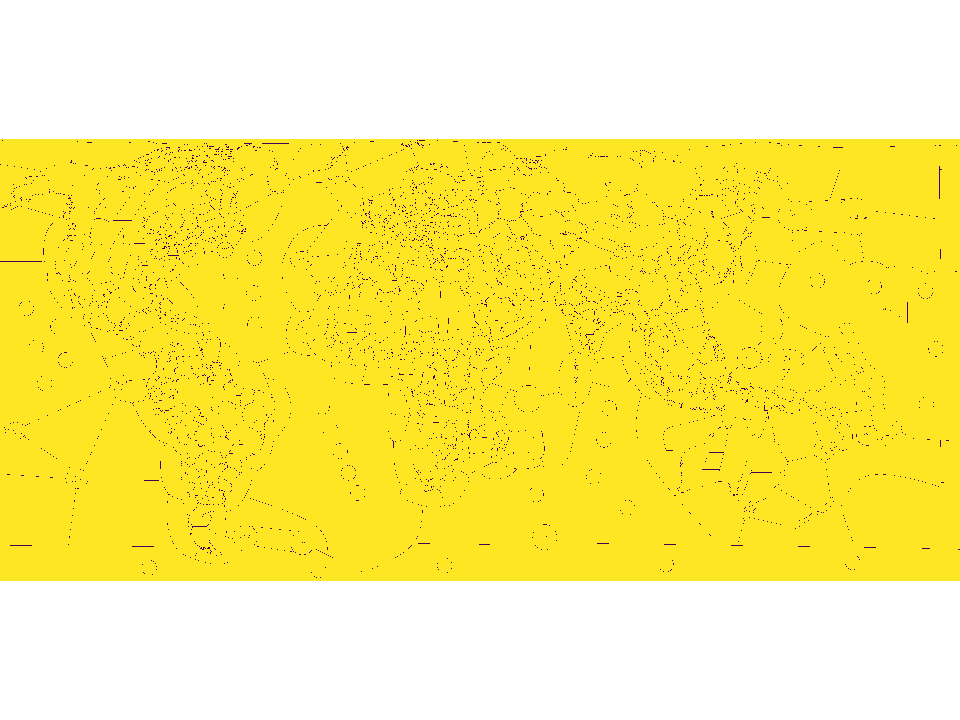

In [8]:
show(im)

In [9]:
# # kernel = np.array([[-1,1,0],[1,-1,0],[0,0,0]])
# # diags = signal.convolve2d(im, kernel, boundary='fill')[1:-1,1:-1] > 1
# # kernel = np.array([[0,1,-1],[0,-1,1],[0,0,0]])
# # diags += signal.convolve2d(im, kernel, boundary='fill')[1:-1,1:-1] > 1
# # im = np.logical_not(im).astype(int)
# kernel = np.array([[1,-1],[-1,1]])
# diags = np.abs(signal.convolve2d(im, kernel, boundary='fill')) > 1
# diags.shape, diags.sum()

In [10]:
# show(diags.astype(int))

In [11]:
# im += diags[1:,:-1].astype(np.uint8)
# im += diags[:-1,:-1].astype(np.uint8)
# im = im.astype(bool).astype(np.uint8)
# im = np.logical_not(im)
# # im[diags[1:,:-1]] = 1
# # im[diags[:-1,1:]] = 1
# # im[diags[1:,1:]] = 1
# im.shape, im.sum()

In [12]:
# show(im)

In [13]:
label_image = label(im)

In [14]:
label_image.max()

1304

<IPython.core.display.Javascript object>


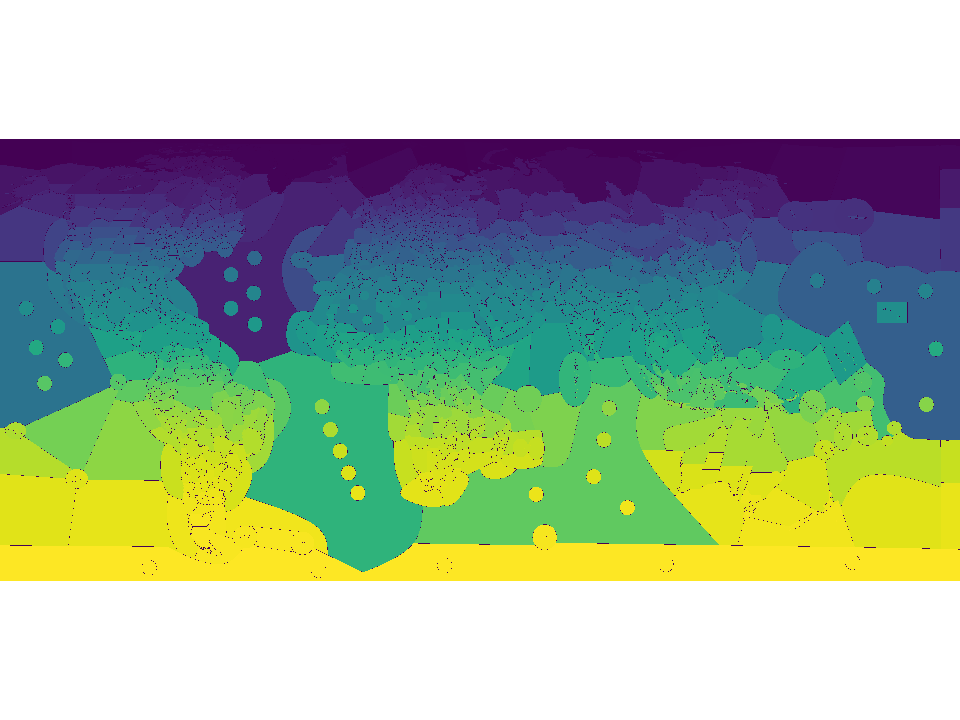

In [15]:
show(label_image)

In [16]:
expanded = expand_labels(label_image, distance=20)

In [17]:
(expanded==0).any()

False

In [18]:
# show(expanded)

In [82]:
borders = find_boundaries(expanded, connectivity=1, mode='thick', background=0)
# borders = np.logical_not(borders)
nice = expanded.copy()
# nice = (nice-1).astype(str)
nice[borders==1] = -1000
# show(borders)

<IPython.core.display.Javascript object>


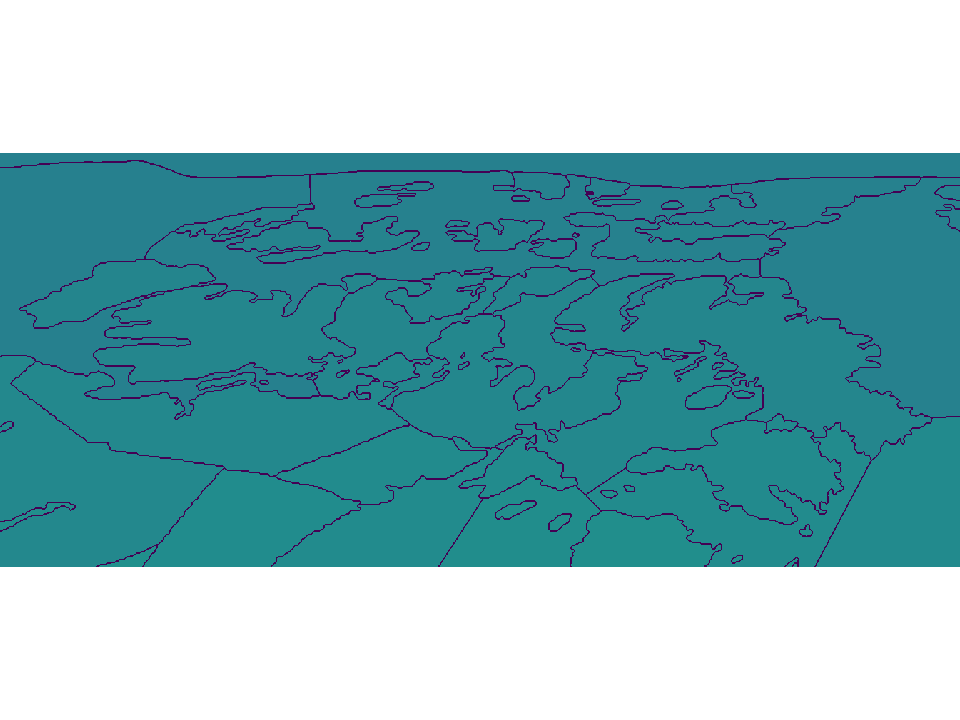

In [83]:
# show((nice-1)%1000)
show(nice)
def format_coord(x, y):
    x, y = int(x), int(y)
    v = str(nice[y,x]-1)
    return f'{x}, {y} ({v})'
ax = plt.gca()
# ax.format_coord = lambda x,y,z: '%10d, %10d %10d' % (x,y,z)
ax.format_coord = format_coord

In [18]:
# borders = find_boundaries(expanded, connectivity=1, mode='thick', background=0)
# borders = np.logical_not(borders)
# borders.shape

In [19]:
# show(borders)

In [63]:
# fixed_im = Image.fromarray(borders)
# fixed_im.save("extra/col_fixed_v2.gif")

In [19]:
# fig, ax = plt.subplots()
# ax.plot(np.random.rand(10))

# def onclick(event):
#     print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#           ('double' if event.dblclick else 'single', event.button,
#            event.x, event.y, event.xdata, event.ydata))

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [21]:
regions = regionprops(expanded)
len(regions)

1304

In [22]:
from omnibelt import save_yaml, load_yaml

In [ ]:
# col_idents
# [0, 1, 5, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 13, 18, 15, 16, 20, 29, 19, 29, 1, 30, 23, 24, 29, 29, 27, 28, 30, 34, 11, 32, 33, 35, 35, 13, 42, 38, 40, 40, 40, 42, 65, 44, 45, 46, 13, 58, 49, 16, 51, 52, 53, 54, 55, 56, 28, 58, 59, 60, 72, 62, 62, 64, 77, 28, 102, 77, 62, 70, 72, 72, 73, 55, 77, 76, 78, 78, 108, 116, 81, 82, 83, 84, 111, 86, 87, 88, 89, 90, 82, 115, 93, 94, 95, 96, 97, 98, 99, 148, 101, 102, 82, 104, 105, 106, 118, 108, 169, 49, 136, 118, 113, 27, 115, 116, 117, 120, 119, 134, 162, 122, 124, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 108, 155, 137, 138, 139, 140, 141, 142, 143, 144, 151, 146, 147, 148, 156, 195, 154, 152, 153, 154, 155, 156, 157, 158, 262, 160, 161, 162, 163, 164, 165, 169, 167, 168, 169, 207, 171, 175, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 262, 192, 181, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 294, 860, 206, 207, 208, 209, 210, 182, 212, 213, 214, 248, 216, 217, 218, 240, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 105, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 341, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 202, 310, 311, 337, 314, 314, 315, 316, 317, 318, 319, 320, 354, 344, 323, 324, 325, 326, 327, 311, 329, 311, 331, 332, 333, 334, 335, 352, 337, 338, 233, 340, 342, 342, 343, 344, 345, 346, 347, 311, 349, 350, 351, 353, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 340, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 441, 389, 390, 391, 392, 393, 394, 395, 396, 397, 396, 399, 349, 320, 402, 403, 404, 405, 406, 396, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 470, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 441, 452, 442, 465, 444, 445, 446, 447, 448, 457, 450, 451, 452, 453, 456, 455, 472, 458, 494, 459, 460, 524, 462, 463, 464, 465, 466, 467, 468, 572, 473, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 501, 495, 496, 497, 498, 499, 500, 501, 502, 464, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 535, 515, 516, 517, 570, 519, 520, 521, 539, 523, 524, 525, 450, 622, 528, 529, 530, 531, 532, 533, 534, 535, 536, 571, 538, 539, 540, 541, 542, 543, 544, 545, 546, 570, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 579, 576, 577, 578, 582, 580, 581, 586, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 611, 597, 611, 599, 600, 601, 602, 573, 604, 605, 606, 607, 608, 609, 610, 618, 612, 613, 614, 615, 616, 617, 626, 619, 620, 621, 622, 623, 624, 707, 635, 646, 636, 629, 630, 631, 632, 633, 634, 652, 647, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 656, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 720, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 684, 716, 717, 718, 719, 731, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 748, 732, 733, 734, 735, 736, 753, 738, 739, 748, 741, 768, 743, 744, 745, 746, 747, 756, 749, 750, 751, 752, 753, 757, 755, 756, 770, 763, 759, 763, 761, 763, 763, 764, 765, 766, 688, 770, 769, 784, 771, 772, 773, 774, 775, 776, 777, 780, 779, 780, 781, 782, 783, 801, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 781, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 807, 807, 823, 824, 825, 826, 806, 829, 829, 830, 831, 792, 833, 834, 855, 830, 807, 813, 839, 840, 848, 842, 869, 844, 845, 846, 847, 873, 849, 850, 851, 882, 813, 854, 855, 856, 857, 867, 859, 860, 861, 862, 863, 864, 865, 866, 868, 880, 869, 873, 871, 872, 885, 874, 885, 876, 890, 888, 879, 895, 881, 921, 883, 884, 891, 886, 887, 902, 890, 932, 909, 865, 893, 903, 901, 896, 905, 898, 899, 900, 901, 902, 905, 904, 918, 906, 907, 908, 910, 912, 911, 912, 913, 914, 915, 916, 896, 930, 919, 920, 929, 922, 923, 924, 925, 944, 927, 928, 929, 930, 931, 941, 933, 934, 935, 916, 937, 938, 939, 940, 941, 942, 962, 952, 945, 958, 947, 952, 952, 950, 951, 964, 953, 962, 958, 956, 957, 962, 959, 960, 915, 970, 963, 969, 965, 966, 967, 968, 977, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 966, 981, 982, 983, 984, 984, 989, 987, 988, 990, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1002, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1010, 1009, 1010, 1011, 1012, 1013, 1014, 1018, 1016, 1017, 1024, 1019, 1020, 1021, 1031, 1023, 1038, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1044, 1039, 1040, 1006, 1042, 1043, 1049, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1058, 1054, 1055, 1055, 1057, 1063, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1119, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1093, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1130, 1130, 1137, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1141, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
# All region idents collected, saved to: extra\col_idents.yaml

In [ ]:
# idents = [0, 1, 5, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 13, 18, 15, 16, 20, 29, 19, 29, 1, 30, 23, 24, 29, 29, 27, 28, 30, 34, 11, 32, 33, 35, 35, 13, 42, 38, 40, 40, 40, 42, 65, 44, 45, 46, 13, 58, 49, 16, 51, 52, 53, 54, 55, 56, 28, 58, 59, 60, 72, 62, 62, 64, 77, 28, 102, 77, 62, 70, 72, 72, 73, 55, 77, 76, 78, 78, 108, 116, 81, 82, 83, 84, 111, 86, 87, 88, 89, 90, 82, 115, 93, 94, 95, 96, 97, 98, 99, 148, 101, 102, 82, 104, 105, 106, 118, 108, 169, 49, 136, 118, 113, 27, 115, 116, 117, 120, 119, 134, 162, 122, 124, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 108, 155, 137, 138, 139, 140, 141, 142, 143, 144, 151, 146, 147, 148, 156, 195, 154, 152, 153, 154, 155, 156, 157, 158, 262, 160, 161, 162, 163, 164, 165, 169, 167, 168, 169, 207, 171, 175, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 262, 192, 181, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 294, 860, 206, 207, 208, 209, 210, 182, 212, 213, 214, 248, 216, 217, 218, 240, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 105, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 341, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 202, 310, 311, 337, 314, 314, 315, 316, 317, 318, 319, 320, 354, 344, 323, 324, 325, 326, 327, 311, 329, 311, 331, 332, 333, 334, 335, 352, 337, 338, 233, 340, 342, 342, 343, 344, 345, 346, 347, 311, 349, 350, 351, 353, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 340, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 441, 389, 390, 391, 392, 393, 394, 395, 396, 397, 396, 399, 349, 320, 402, 403, 404, 405, 406, 396, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 470, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 441, 452, 442, 465, 444, 445, 446, 447, 448, 457, 450, 451, 452, 453, 456, 455, 472, 458, 494, 459, 460, 524, 462, 463, 464, 465, 466, 467, 468, 572, 473, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 501, 495, 496, 497, 498, 499, 500, 501, 502, 464, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 535, 515, 516, 517, 570, 519, 520, 521, 539, 523, 524, 525, 450, 622, 528, 529, 530, 531, 532, 533, 534, 535, 536, 571, 538, 539, 540, 541, 542, 543, 544, 545, 546, 570, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 579, 576, 577, 578, 582, 580, 581, 586, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 611, 597, 611, 599, 600, 601, 602, 573, 604, 605, 606, 607, 608, 609, 610, 618, 612, 613, 614, 615, 616, 617, 626, 619, 620, 621, 622, 623, 624, 707, 635, 646, 636, 629, 630, 631, 632, 633, 634, 652, 647, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 656, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 720, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 684, 716, 717, 718, 719, 731, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 748, 732, 733, 734, 735, 736, 753, 738, 739, 748, 741, 768, 743, 744, 745, 746, 747, 756, 749, 750, 751, 752, 753, 757, 755, 756, 770, 763, 759, 763, 761, 763, 763, 764, 765, 766, 688, 770, 769, 784, 771, 772, 773, 774, 775, 776, 777, 780, 779, 780, 781, 782, 783, 801, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 781, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 807, 807, 823, 824, 825, 826, 806, 829, 829, 830, 831, 792, 833, 834, 855, 830, 807, 813, 839, 840, 848, 842, 869, 844, 845, 846, 847, 873, 849, 850, 851, 882, 813, 854, 855, 856, 857, 867, 859, 860, 861, 862, 863, 864, 865, 866, 868, 880, 869, 873, 871, 872, 885, 874, 885, 876, 890, 888, 879, 895, 881, 921, 883, 884, 891, 886, 887, 902, 890, 932, 909, 865, 893, 903, 901, 896, 905, 898, 899, 900, 901, 902, 905, 904, 918, 906, 907, 908, 910, 912, 911, 912, 913, 914, 915, 916, 896, 930, 919, 920, 929, 922, 923, 924, 925, 944, 927, 928, 929, 930, 931, 941, 933, 934, 935, 916, 937, 938, 939, 940, 941, 942, 962, 952, 945, 958, 947, 952, 952, 950, 951, 964, 953, 962, 958, 956, 957, 962, 959, 960, 915, 970, 963, 969, 965, 966, 967, 968, 977, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 966, 981, 982, 983, 984, 984, 989, 987, 988, 990, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1002, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1010, 1009, 1010, 1011, 1012, 1013, 1014, 1018, 1016, 1017, 1024, 1019, 1020, 1021, 1031, 1023, 1038, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1044, 1039, 1040, 1006, 1042, 1043, 1049, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1058, 1054, 1055, 1055, 1057, 1063, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1119, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1093, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1130, 1130, 1137, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1141, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
# # v2
# idents = [0, 20, 2, 6, 4, 5, 16, 7, 8, 9, 15, 43, 84, 15, 14, 24, 18, 17, 18, 22, 20, 21, 31, 24, 26, 45, 32, 31, 36, 29, 86, 32, 42, 42, 9, 38, 45, 42, 41, 41, 42, 48, 42, 59, 53, 45, 46, 48, 52, 64, 64, 64, 62, 83, 82, 55, 56, 61, 61, 59, 61, 63, 62, 63, 92, 76, 66, 84, 68, 69, 70, 71, 93, 73, 86, 97, 76, 77, 96, 85, 84, 81, 97, 83, 84, 85, 86, 87, 97, 118, 96, 91, 92, 93, 97, 95, 96, 98, 98, 128, 136, 101, 102, 103, 145, 131, 106, 107, 108, 117, 110, 131, 135, 113, 114, 115, 116, 117, 118, 119, 120, 121, 171, 123, 124, 134, 126, 138, 156, 129, 129, 158, 138, 133, 134, 135, 136, 137, 155, 139, 155, 159, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 179, 186, 160, 161, 162, 163, 164, 165, 166, 167, 174, 169, 170, 171, 177, 220, 178, 175, 176, 180, 178, 179, 180, 181, 182, 289, 184, 185, 186, 187, 188, 204, 190, 191, 233, 193, 197, 251, 196, 197, 198, 199, 204, 201, 202, 203, 223, 205, 237, 207, 208, 209, 210, 211, 212, 213, 214, 289, 216, 205, 218, 219, 220, 221, 222, 223, 224, 289, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 276, 265, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 299, 260, 261, 262, 263, 264, 265, 266, 267, 268, 245, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 321, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 321, 304, 305, 306, 307, 308, 309, 310, 311, 330, 323, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 369, 230, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 378, 339, 340, 341, 342, 343, 366, 346, 346, 347, 348, 349, 350, 351, 371, 380, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 378, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 496, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 458, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 485, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 465, 485, 489, 414, 466, 467, 468, 469, 470, 471, 481, 473, 474, 414, 485, 477, 480, 479, 495, 501, 482, 483, 553, 498, 486, 487, 497, 489, 490, 491, 492, 548, 498, 495, 496, 498, 499, 531, 500, 521, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 526, 522, 523, 524, 525, 529, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 565, 543, 544, 545, 638, 547, 554, 549, 550, 568, 552, 553, 600, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 704, 573, 574, 575, 576, 577, 580, 579, 580, 581, 582, 583, 584, 585, 586, 790, 588, 589, 590, 591, 592, 559, 594, 595, 596, 597, 598, 599, 600, 601, 602, 611, 604, 605, 606, 611, 611, 609, 610, 616, 612, 613, 614, 616, 619, 617, 645, 619, 620, 621, 622, 623, 624, 632, 626, 627, 643, 643, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 686, 644, 645, 646, 647, 648, 649, 686, 651, 652, 653, 654, 655, 656, 678, 686, 689, 660, 689, 662, 663, 664, 665, 666, 686, 689, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 689, 680, 692, 682, 683, 684, 689, 686, 687, 741, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 783, 711, 784, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 783, 726, 755, 728, 729, 730, 731, 732, 733, 734, 735, 761, 737, 738, 748, 740, 741, 761, 743, 818, 745, 761, 747, 758, 749, 761, 751, 752, 753, 754, 755, 756, 757, 773, 759, 876, 769, 769, 783, 764, 765, 789, 767, 768, 769, 784, 783, 772, 786, 774, 775, 776, 817, 778, 779, 786, 781, 782, 783, 798, 785, 734, 787, 734, 796, 790, 791, 792, 814, 829, 795, 816, 797, 820, 859, 820, 801, 837, 803, 820, 894, 806, 807, 808, 820, 810, 811, 812, 816, 814, 837, 816, 817, 726, 819, 820, 726, 837, 929, 831, 825, 726, 827, 831, 868, 861, 831, 832, 894, 834, 894, 836, 840, 894, 839, 857, 841, 842, 843, 844, 845, 846, 847, 894, 880, 850, 880, 852, 872, 854, 992, 856, 891, 858, 859, 894, 894, 894, 863, 864, 865, 894, 867, 885, 869, 937, 883, 881, 873, 883, 875, 894, 877, 883, 883, 880, 913, 894, 890, 884, 885, 1069, 903, 894, 889, 893, 891, 1069, 918, 929, 895, 896, 897, 898, 899, 900, 901, 1069, 914, 904, 905, 906, 907, 929, 1069, 970, 929, 912, 913, 914, 915, 1069, 1069, 918, 919, 920, 921, 922, 1069, 992, 1069, 949, 927, 928, 929, 930, 931, 932, 1069, 934, 935, 1069, 937, 938, 949, 1069, 941, 1069, 974, 1069, 1069, 946, 947, 970, 967, 1069, 951, 962, 953, 996, 955, 1069, 957, 1069, 959, 1069, 961, 1003, 963, 1069, 496, 966, 1018, 1069, 1069, 970, 971, 1069, 1069, 981, 975, 988, 1069, 978, 1069, 993, 981, 982, 983, 984, 985, 1069, 987, 988, 989, 1069, 991, 992, 1015, 1001, 1069, 996, 1015, 1005, 999, 1000, 1019, 1017, 1029, 1004, 1023, 1006, 1069, 1019, 1026, 1019, 1069, 1012, 1025, 1069, 1038, 1071, 1017, 1062, 1019, 1020, 1021, 1022, 1029, 1024, 1039, 1027, 1077, 1028, 1049, 1040, 1038, 1032, 1069, 1040, 1035, 1036, 1037, 1038, 1039, 1042, 1041, 1059, 1043, 1044, 1069, 1046, 1069, 1049, 1054, 1069, 1051, 1069, 1069, 1054, 1055, 1056, 1057, 1099, 1075, 1060, 1061, 1074, 1064, 1093, 1065, 1066, 496, 1068, 1069, 1070, 1071, 1090, 1073, 1074, 1075, 1076, 1087, 1087, 1079, 1080, 1099, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1105, 1117, 1098, 1092, 1093, 1114, 1095, 1117, 1117, 1108, 1099, 1100, 1101, 1117, 1103, 1104, 1106, 1119, 1107, 1108, 1109, 1110, 1111, 1112, 1117, 1129, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1134, 1134, 1140, 1136, 1137, 1177, 1140, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1152, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1160, 1159, 1160, 1161, 1162, 1163, 1164, 1174, 1166, 1167, 1168, 1174, 1170, 1171, 1184, 1173, 1202, 1175, 1202, 1177, 1178, 1179, 1180, 1181, 1182, 1202, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1202, 1193, 1194, 1156, 1196, 1202, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1210, 1207, 1208, 1209, 1215, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1271, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1246, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1246, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1285, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1282, 1282, 1290, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1294, 1296, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303]
# nodes = ['none0', 'Barents Sea', 'Greenland Sea', 'Eastern Arctic Ocean', 'Kara Sea', 'Siberian Sea', 'Northwest Passage', 'Baffin Bay', 'Chukchi Sea', 'Svalbard', 'Beaufort Sea', 'Western Arctic Ocean', 'Norwegian Sea', 'Nunavut', 'Siberia', 'Denmark Strait', 'Peel Sound', 'Qeqertarsuatsiaat', 'Suntar', 'Yamburg', 'Utqiagvik', 'Alta', 'Vardo', 'Oyotung', 'Paulatuk', 'Foxe Basin', 'Polyarny', 'Murmansk', 'Yukon', 'Ulukhaktok', 'Nuuk', 'lake', 'Varandey', 'Karalveyem', 'Lappland', 'Kugaaruk', 'Bering Strait', 'Trondhiem', 'Umingmaktok', 'Baffin', 'none1', 'Davis Strait', 'Kem', 'Hudson Strait', 'Ukkusiksalik', 'Eyjafjallajokull', 'Yaponskoye More', 'West Hudsons Bay', 'Gulf of Bothnia', 'Magadan', 'Karlstad', 'Arkhangelsk', 'Oulo', 'Gizhiga', 'Icelandic Sea', 'Arviat', 'Kirensk', 'NAO', 'East Hudsons Bay', 'Cordova', 'Bergen', 'Helsinki', 'Coats', 'none2', 'Magadan Sea', 'Oslo', 'Norwegian Sea island', 'Chelyabinsk', 'none3', 'Iqaluit', 'Tver', 'Kekra', 'St. Petersburg', 'Omsk', 'Gulf of Alaska', 'Nerchinsk', 'Patuanak', 'Labrador Sea', 'North Sea', 'Kangiqsujuaq', 'Kagyrgyn', 'Kuujjiauq', 'Natuashish', 'Inukjuak', 'Sekani', 'Athabasca', 'Herchmer', 'none4', 'Sea of Okhotsk', 'North Baltic', 'Skaggerak', 'Moskva', 'Penzhina', 'Pskov', 'Ulyanovsk', 'Tallin', 'Nunam Iqua', 'Elgin', 'Aleutin Island water', 'Fort Mackenzie', 'Aleutian Island Pass', 'Ogre', 'Stockholm', 'Sayansk', 'Riga', 'Bering Island water', 'Heligoland Bight', 'Chumikan', 'Irish Sea', 'Kuujjuarapik', 'Vilnius', 'South Baltic', 'Smolensk', 'Wappus', 'Sachigo', 'Northeast Pacific Ocean', 'York', 'Northern Atlantic Ocean', 'Spurn Bight', 'none5', 'Voronezh', 'Matiyininiwak', 'Bryansk', 'Relais-Gabriel', 'Dublin', 'Konigsberg', 'Nipawin', 'Gothenburg', 'Bialystok', 'Liv.', 'Denmark', 'Holstein', 'Kiel', 'Danzig', 'Nur-Sultan', 'Stettin', 'Opasquia', 'Elk', 'Sakhalin', 'Glasgow', 'Bering Island', 'Vladivostok', 'Labrador', 'Tsilhoqotin', 'Andreanof Islands', 'Sakhalin Coast', 'none6', 'Lee.', 'Silesia', 'Yichun', 'Leipzig', 'Berlin', 'Cork', 'Wales', 'Lublin', 'Peawanuck', 'Warszawa', 'Ams.', 'London', 'Aleutin Island', 'Rowne', 'Bremen', 'Inner Mongolia', 'Crimea', 'Kyiv', 'Rostov', 'Murun', 'Northwestern Pacific Ocean', 'Fort Rupert', 'Obedjiwan', 'Bru.', 'Pacific Coast', 'Saxony', 'Ridder', 'Niitsitapi', 'Plymouth', 'Astrakhan', 'Frankfurt', 'none7', 'Plaisance', 'Gulf of St. Lawrence', 'Belgium', 'Krakow', 'Uralsk', 'English Channel', 'Baie-Comeau', 'Calais', 'Prague', 'Asinaan', 'Brno', 'Krosno', 'Tosontsengel', 'Zilina', 'Bavaria', 'Lwow', 'Ulaanbaatar', "Gasg'ptnnaqan", 'Normandy', 'Odesa', 'Lorraine', 'Havre-Saint-Pierre', 'Burgundy', 'Brest', 'Baden', 'Eastern Atlantic Ocean', 'Makoua', 'Kosice', 'Acadia', 'Ottawa', 'Paris', 'Karamay', 'Alsace', 'Nimiipu', 'Haaninin', 'Itscheabine', 'Superior', 'Vienna', 'North Bay', 'Budapest', 'Kamchatka', 'Bay of Biscay', 'Quileute', 'Japanese Coast', 'Tyrolia', 'Oradea', 'Near Islands', 'Quebec City', 'Kantau', 'Romania', 'Cape Breton Bay', 'Vichy', 'Berne', 'Noquet', 'Black Sea', 'Huron', 'Aksuat', 'Saintes', 'Caspian Sea', 'none8', 'Port Royal', 'Bucharest', 'Venezia', 'Trieste', 'Caucasus', 'none9', 'Beijing', 'Marseilles', 'Aktau', 'Piedmont', 'Genoa', 'Nice', 'Croatia', 'Tsisistas', 'Yanktonai', 'L. Huron', 'California', 'Montreal', 'Belgrade', 'Michigan', 'Sault Ste. Marie', 'Nouvelle-Ecosse Coast', 'none10', 'New England', 'Fort Detroit', 'Adriatic Sea', 'Nukus', 'Bordeaux', 'none11', 'Hokkaido', 'Kingston', 'Apsaalooke', 'Eeelalapito', 'Xinjiang', 'Tkaronto', 'Tuscany', 'Split', 'Portuguese Coast', 'Oneida', 'Nis', 'Sea of Japan', 'Liaoning', 'Bohogue', 'Gulf of Lyon', 'Toulouse', 'Ontario', 'Bulgaria', 'Ille de Sable water', 'Rome', 'Boston', 'Cape Cod Bay', 'Tyrrhenian Sea', 'Vigo', 'Wahpekute', 'Tbilisi', 'Burgos', 'Wenro', 'none12', 'Macedonia', 'Bishkek', 'Albania', 'none13', 'Leon', 'Aragon', 'Cor.', 'Pyongyang', 'Erie', 'Barcelona', 'Ningxia', 'Balkanbat', 'none14', 'New York', 'Kilatika', 'Ille de Sable', 'Paiute', 'Tyoteoke', 'Porto', 'Naples', 'Samarkand', 'Ankara', 'Wyandot', 'Philly', 'Baku', 'Wea', 'Algerian Coast', 'N. Y. Bight', 'Rize', 'Oma', 'Nevada', 'Athens', 'NAU1', 'Hinonoeino', 'Armenia', 'Murcia', 'Madrid', 'Sar.', 'Lisboa', 'none15', 'Azores water', 'Shaanxi', 'Aegean Sea', 'Pahatsi', 'Yellow Sea', 'Seville', 'Ionian Sea', 'Madeira Coast', 'Konstaniniyye', 'Iwate', 'Virginia', 'Wichita', 'Erbil', 'Baltimore', 'Kahramanmaras', 'Straits of Gibraltar', 'Qinghai', 'Tuteio', 'Chesapeake Bay', 'Tehran', 'Faro', 'Chisca', 'Longnan', 'Malaga', 'Kabul', 'Shandong', 'Morea', 'Akita', 'Asian Pacific Ocean', 'Mashhad', 'Sari', 'Azores', 'PAO', 'Libyan Sea', 'Edo', 'Tunis', 'Syria', 'Moroccan Coast', 'Herat', 'Annaba', 'Lahore', 'Hopi', 'Teyas', 'Naisha', 'Algiers', 'Levantine Sea', 'Cherokee', 'Tibet', 'Cheraw', 'Wilmington', 'Tiemcen', 'Yazoo', 'Dezful', 'Shiga', 'Phoenix', 'NAO2', 'Rabat', 'Gulf of California', 'Hiroshima', 'Izmir', 'Tokyoite Coast', 'Fez', 'Korean Coast', 'Savannah', 'Isfahan', 'Jerusalem', 'Baghdad', 'Tohome', 'Muskogee', 'Yazd', 'Setonaikai Sea', 'Canarian Bay', 'Midelt', 'Casablanca', 'Zabol', 'Georgia', 'Hubei', 'Eyeish', 'Seoul', 'WSA', 'Chengdu', 'Coast of Florida', 'Tripoli', 'none16', 'Nouvelle Orleans', 'Bandar', 'Agadir', 'Benghazi', 'Madeira Coast land', 'Shikoku', 'Mobile', 'Chihuahua', 'Nagasaki', 'Western Atlantic Ocean', 'Tafilalt', 'Punjab', 'Badiyat ash Sham', 'Sirte', 'Monterrey', 'Karachi', 'Gran Canaria water', 'Siraf', 'Eskenderiyya', 'Karankawa', 'Ningbo', 'Q8', 'none17', 'Pensacola', 'East China Sea', 'Orlando', 'Bay of Florida', 'Laayoune', 'Persian Gulf', 'Shahjahanabad', 'NAO3', 'Agra', 'Qafsah', 'Medina', 'Red Sea', 'East Gulf of Mexico', 'San Diego', 'Tezu', 'Qeshm', 'Fujian', 'Philippine Sea', 'ESA', 'Gwadar', 'WSA1', 'Siwa', 'Thatta', 'West Gulf of Mexico', 'Saharan Coast', 'Gran Canaria', 'Egyptian Desert', 'Tamaulipas', 'Arabia', 'Guada', 'Bahamas water', 'Nayarit', 'Jorhat', 'Bhilsa', 'Muscat', 'Qatar', 'ESA1', 'Nanning', 'Chattogram', 'Gulf of Khambhat', 'Sylhet', 'PAO1', 'NAO4', 'ESA2', 'Taiwan', 'Tadmekka', 'Hawaii water', 'Miami', 'Diu', 'Dhaka', 'Arguin', 'Mecca', 'WSA2', 'Lashio', 'Patna', 'Balasore', 'South China Sea', 'Hanoi', 'Burma', 'Jalisco', 'Bay of Bengal', 'Antillas Mayores', 'Handia', 'West Caribbean', 'Puri', 'Jeypore', 'Cabo Verde Coast', 'Mexico City', 'Moa', 'Suakin', 'Gulf of Aden', 'Surat', 'ESA3', 'Havana', "Gulf of 'Nam", 'Yunnan', 'Trarza', 'Guam', 'Bahamas', 'Antillian Coast', 'Hawaii', 'WSA3', 'Madama', 'Yucatan', 'NAO5', 'Pune', 'Haitian Bay', 'Hainan', 'Arcot', 'Burmese Coast', 'Yemen', 'Kutum', 'Haiti', 'Punta Cana', 'Vietiane', 'PAO2', 'Macronesia', 'Cabo Verde water', 'Khandesh', 'Andhra', 'Marshall Islands', 'Sibiridugu', 'Hispanolian Coast', 'Arabian Sea', 'Bijapur', 'Mae Sot', 'Jam.', 'P.R.', 'Gustavia', 'Brakna', 'Bel.', 'Indian Cape', 'East Caribbean', 'Coast of India', 'Guinean Coast', 'Chiapas', 'Colombian Coast', 'Moussoro', 'Philippine Coast', 'Katsina', 'Aden', 'Gustavia land', 'Andaman Sea', 'Beja', 'Central American Coast', 'Tak', 'Hejaz', 'Fouromi', 'Goa', 'Dongola', 'Vietnam', 'Ati', 'Guatemala', 'Honduras', 'Bangkok', 'Massawa', 'Do', 'Nyala', 'Bambuk', 'Horn of Africa', 'Gabu', 'Ouagadougou', 'Georgetown Cape', 'Cabo Verde land', 'Nicaragua', 'Chennai', 'Gondar', 'Aksum', 'Kadugli', 'Darfur', 'Moshi', "N'Djamena", 'Guam land', 'Gulf of Thailand', 'Pindinga', 'PAO3', 'Al-Junaynah', 'Coast of Cayenne', 'Fami', 'Malaysian Coast', 'Kollam', 'Futa Jallon', 'Colombia', 'Bili', 'Puducherry', 'Altagracia', 'Nekemte', 'Bismarck Sea', 'Bosaso', 'Phuket', 'Phnom Penh', 'Berbera', 'Manilla', 'Ganye', 'Gyaaman', 'Tacarigua', 'Palau water', 'Yamoussoukro', 'Addis Ababa', 'Rumbek', 'Micronesia', 'Beafada', 'Ijebu', 'Gulf of Panama', 'Batouri', 'Colombo', 'SAO', 'none18', 'Juba', 'Bonny', 'Zemio', 'Antioquia', 'POA4', 'Yebelo', 'Georgetown', 'Somalia', 'Zaraza', 'Coast of Sumatra', 'Laccadive Sea', 'Celebes Sea', 'Choco', 'Panama', 'Annai', 'none19', 'New Guinean Coast', 'Davao', 'Gulf of Guinea', 'Baia de Santa Rosa', 'Popayan', 'Ivory Coast', 'Atabapo', 'Uganda', 'Gold Coast', 'Paramaribo', 'Perak', 'Samoan Coast', 'Cayenne', 'Mombasa', 'Palau', 'Tuaran', 'Mbandaka', 'Micronesia land', 'Cajana', 'Kumaka', 'Brunei', 'Kismayo', 'Soloman Sea', 'Banjarmasin', 'Marshall Islands land', 'Macapa', 'Cauca', 'Rio Branco', 'Guaju', 'Java Sea', 'Douala', 'Ouesso', 'Camopi', 'Neiva', 'Vaitupu', 'Boende', 'Zoe', 'Isla Isabella', 'Kampala', 'Caroebe', 'Amazonas', 'Sandae', 'Bandundu', 'Langsa', 'Quito', 'Brazilian Cape', 'Fores Sea', 'Sing.', 'Rio Guayes', 'INO', 'Canelos', 'Muturu', 'none20', 'Gabon', 'Caqueta', 'Amazon', 'Maldives', 'Dumai', 'Belem', 'Ayamu', 'Kalemie', 'Kenyan Coast', 'Kongo Coast', 'Vaiputu land', 'Isla Isabella land', 'Sao Luis', 'Seychelles', 'Bukavu', 'Canari', 'Pacific Triangle', 'Quijos', 'Bay of Sambava', 'Loja', 'Kenge', 'Curup', 'Palembang', 'Kinshasa', 'Soloman Islands water', 'Eastern Amazon', 'Recife', 'Southwest Indian Ocean', 'Kasim', 'Tajara', 'Indonesian Coast', 'none21', 'Para', 'Pisqupampa', 'Tuvalu', 'Chanchan', 'Mbeya', 'Maldives land', 'Port Moresby', 'Tanzania', 'Tocantins', 'Sula', 'Lae', 'Palmas', 'SAO1', 'South American Coast', 'Ucayali', 'Luanda', 'Lima Bay', 'Jakarta', 'INO1', 'Papua', 'Likasi', 'Angola', 'Seychelles land', 'Coral Sea', 'Bagamoyo', 'Huanuco', 'Madre de Dios', 'Salvador', 'Northern Channel', 'Timor Sea', 'Tuvalu land', 'Chimbote', 'Brasillia', 'Lata water', 'Malawi', 'Cerejeiras', 'Iles Horn', 'Soloman Islands', 'none22', 'Java', 'Northern Coast', 'none23', 'Benguela', 'Angolan Coast', 'Bay of Brazil', 'Cuzco', 'Lima', 'Montepeuz', 'San Joaquin', 'Timor', 'Lata', 'Queensland', 'Mongu', 'Northern Territory', 'Chuquiabo', 'Lusaka', 'none24', 'Nazaca', 'Samoa', 'SAO2', 'Papara', 'Vanatu water', 'Namibe', 'Nacala', 'Caceres', 'Fuerte Borbon', 'Derby', 'Samoa land', 'Fiji water', 'Peruvian Coast', 'Rio de Janerio', 'Tuamotu Archipelago', 'Cochabamba', 'Arequipa', 'Papara land', 'Quelimane', 'Mauritius Coast', 'Boriziny', 'none25', 'Coast of Madagascar', 'Karoi', 'Ocean of Tonga', 'INO2', 'Antsalova', 'Beira', 'Harare', 'Sambava', 'Kadoma', 'Arica', 'Opuwo', 'Tonga water', 'Ofaie', 'Fiji', 'Tsao', 'Mauritius water', 'Mozambique Channel', 'Antananarivo', 'Jujuy', 'Reunion water', 'Namibian Coast', 'Tonga', 'New Caledonia water', 'Mapoka', 'Bulawayo', 'Santiago Coast', 'Sao Vicente', 'SAO3', 'Vanuatu', 'Mauritius', 'Chaco Central', 'Windhoek', 'Iakora', 'Calama', 'Reunion', 'Vryburg', 'Inhambane', 'Antaly', 'Coast of Australia', 'New Caledonia', 'Upington', 'Pretoria', 'Maputo Bay', 'Reunion Bay', 'Western Australia', 'Santa Catarina', 'Santiago del Estero', 'Auckland Bay', 'El Penon', 'Lagoa dos Patos', 'Chaco Austral', 'Cape of Madagascar', 'Copiapo', 'Albany', 'Santa Tecla', 'La Rioja', 'SAO4', 'Zuid-Afrika', 'Adelaide', 'Rio Grande do Sul', 'Durban', 'Isla la Pascua water', 'INO3', 'Rosario', 'Sydney', 'Springbok', 'Eastern Cape', 'La Serena', 'PAO5', 'Hanson Bay', 'Sauce', 'Isla la Pascua', 'South African Cape', 'Banda Oriental', 'Santa Fe', 'Port Elizabeth', 'Calvinia', 'Beaufort-West', 'Southeast Pacific Ocean', 'Great Australian Bight', 'Chanar', 'Chiquiyami', 'Kaapstad', 'SAO5', 'George', 'INO4', 'Tasman Sea', 'Rio del la Plata', 'Melbourne', 'Chiloe', 'Rio Negro', 'Chilean Coast', 'Robe', 'Carmen', 'Tandil', 'Southwest Atlantic Ocean', 'INO5', 'San Antonio', 'New Zealand Coast', 'Golfo San Matias', 'Tasmania', 'Candelaria', 'Aysen', 'Auckland', "Micky D's water", 'Cayor', 'Kawesqar', 'Island Pass', 'Nelson', 'Sandwich water', 'South American Cape', "Micky D's", 'Falklands', 'Sandwich', 'ANT', 'ANT5', 'ANT4', 'ANT3', 'UNKNOWN']


In [161]:
# idents = [0, 1, 5, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 13, 18, 15, 16, 20, 29, 19, 29, 1, 30, 23, 24, 29, 29, 27, 28, 30, 34, 11, 32, 33, 35, 35, 13, 42, 38, 40, 40, 40, 42, 65, 44, 45, 46, 13, 58, 49, 16, 51, 52, 53, 54, 55, 56, 28, 58, 59, 60, 72, 62, 62, 64, 77, 28, 102, 77, 62, 70, 72, 72, 73, 55, 77, 76, 78, 78, 108, 116, 81, 82, 83, 84, 111, 86, 87, 88, 89, 90, 82, 115, 93, 94, 95, 96, 97, 98, 99, 148, 101, 102, 82, 104, 105, 106, 118, 108, 169, 49, 136, 118, 113, 27, 115, 116, 117, 120, 119, 134, 162, 122, 124, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 108, 155, 137, 138, 139, 140, 141, 142, 143, 144, 151, 146, 147, 148, 156, 195, 154, 152, 153, 154, 155, 156, 157, 158, 262, 160, 161, 162, 163, 164, 165, 169, 167, 168, 169, 207, 171, 175, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 262, 192, 181, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 294, 860, 206, 207, 208, 209, 210, 182, 212, 213, 214, 248, 216, 217, 218, 240, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 105, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 341, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 202, 310, 311, 337, 314, 314, 315, 316, 317, 318, 319, 320, 354, 344, 323, 324, 325, 326, 327, 311, 329, 311, 331, 332, 333, 334, 335, 352, 337, 338, 233, 340, 342, 342, 343, 344, 345, 346, 347, 311, 349, 350, 351, 353, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 340, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 441, 389, 390, 391, 392, 393, 394, 395, 396, 397, 396, 399, 349, 320, 402, 403, 404, 405, 406, 396, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 470, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 441, 452, 442, 465, 444, 445, 446, 447, 448, 457, 450, 451, 452, 453, 456, 455, 472, 458, 494, 459, 460, 524, 462, 463, 464, 465, 466, 467, 468, 572, 473, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 501, 495, 496, 497, 498, 499, 500, 501, 502, 464, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 535, 515, 516, 517, 570, 519, 520, 521, 539, 523, 524, 525, 450, 622, 528, 529, 530, 531, 532, 533, 534, 535, 536, 571, 538, 539, 540, 541, 542, 543, 544, 545, 546, 570, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 579, 576, 577, 578, 582, 580, 581, 586, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 611, 597, 611, 599, 600, 601, 602, 573, 604, 605, 606, 607, 608, 609, 610, 618, 612, 613, 614, 615, 616, 617, 626, 619, 620, 621, 622, 623, 624, 707, 635, 646, 636, 629, 630, 631, 632, 633, 634, 652, 647, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 656, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 720, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 684, 716, 717, 718, 719, 731, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 748, 732, 733, 734, 735, 736, 753, 738, 739, 748, 741, 768, 743, 744, 745, 746, 747, 756, 749, 750, 751, 752, 753, 757, 755, 756, 770, 763, 759, 763, 761, 763, 763, 764, 765, 766, 688, 770, 769, 784, 771, 772, 773, 774, 775, 776, 777, 780, 779, 780, 781, 782, 783, 801, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 781, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 807, 807, 823, 824, 825, 826, 806, 829, 829, 830, 831, 792, 833, 834, 855, 830, 807, 813, 839, 840, 848, 842, 869, 844, 845, 846, 847, 873, 849, 850, 851, 882, 813, 854, 855, 856, 857, 867, 859, 860, 861, 862, 863, 864, 865, 866, 868, 880, 869, 873, 871, 872, 885, 874, 885, 876, 890, 888, 879, 895, 881, 921, 883, 884, 891, 886, 887, 902, 890, 932, 909, 865, 893, 903, 901, 896, 905, 898, 899, 900, 901, 902, 905, 904, 918, 906, 907, 908, 910, 912, 911, 912, 913, 914, 915, 916, 896, 930, 919, 920, 929, 922, 923, 924, 925, 944, 927, 928, 929, 930, 931, 941, 933, 934, 935, 916, 937, 938, 939, 940, 941, 942, 962, 952, 945, 958, 947, 952, 952, 950, 951, 964, 953, 962, 958, 956, 957, 962, 959, 960, 915, 970, 963, 969, 965, 966, 967, 968, 977, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 966, 981, 982, 983, 984, 984, 989, 987, 988, 990, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1002, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1010, 1009, 1010, 1011, 1012, 1013, 1014, 1018, 1016, 1017, 1024, 1019, 1020, 1021, 1031, 1023, 1038, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1044, 1039, 1040, 1006, 1042, 1043, 1049, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1058, 1054, 1055, 1055, 1057, 1063, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1119, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1093, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1130, 1130, 1137, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1141, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
# idents[205] = 205
# idents[298] = 283
# idents[892] = 892
# # idents[865] = 857
# idents[32] = 7
# idents[8] = 7
# idents[45] = 44
# idents[471] = 371
# idents[607] = 519
# idents[670] = 543
# idents[735] = 558
# idents[787] = 743
# idents[927] = 850
# idents[551] = 548
# idents[547] = 547
# idents[864] = 856
# idents[1145] = 1134

# V2
idents = [0, 20, 2, 6, 4, 5, 16, 7, 8, 9, 15, 43, 84, 15, 14, 24, 18, 17, 18, 22, 20, 21, 31, 24, 26, 45, 32, 31, 36, 29, 86, 32, 42, 42, 9, 38, 45, 42, 41, 41, 42, 48, 42, 59, 53, 45, 46, 48, 52, 64, 64, 64, 62, 83, 82, 55, 56, 61, 61, 59, 61, 63, 62, 63, 92, 76, 66, 84, 68, 69, 70, 71, 93, 73, 86, 97, 76, 77, 96, 85, 84, 81, 97, 83, 84, 85, 86, 87, 97, 118, 96, 91, 92, 93, 97, 95, 96, 98, 98, 128, 136, 101, 102, 103, 145, 131, 106, 107, 108, 117, 110, 131, 135, 113, 114, 115, 116, 117, 118, 119, 120, 121, 171, 123, 124, 134, 126, 138, 156, 129, 129, 158, 138, 133, 134, 135, 136, 137, 155, 139, 155, 159, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 179, 186, 160, 161, 162, 163, 164, 165, 166, 167, 174, 169, 170, 171, 177, 220, 178, 175, 176, 180, 178, 179, 180, 181, 182, 289, 184, 185, 186, 187, 188, 204, 190, 191, 233, 193, 197, 251, 196, 197, 198, 199, 204, 201, 202, 203, 223, 205, 237, 207, 208, 209, 210, 211, 212, 213, 214, 289, 216, 205, 218, 219, 220, 221, 222, 223, 224, 289, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 276, 265, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 299, 260, 261, 262, 263, 264, 265, 266, 267, 268, 245, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 321, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 321, 304, 305, 306, 307, 308, 309, 310, 311, 330, 323, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 369, 230, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 378, 339, 340, 341, 342, 343, 366, 346, 346, 347, 348, 349, 350, 351, 371, 380, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 378, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 496, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 458, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 485, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 465, 485, 489, 414, 466, 467, 468, 469, 470, 471, 481, 473, 474, 414, 485, 477, 480, 479, 495, 501, 482, 483, 553, 498, 486, 487, 497, 489, 490, 491, 492, 548, 498, 495, 496, 498, 499, 531, 500, 521, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 526, 522, 523, 524, 525, 529, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 565, 543, 544, 545, 638, 547, 554, 549, 550, 568, 552, 553, 600, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 704, 573, 574, 575, 576, 577, 580, 579, 580, 581, 582, 583, 584, 585, 586, 790, 588, 589, 590, 591, 592, 559, 594, 595, 596, 597, 598, 599, 600, 601, 602, 611, 604, 605, 606, 611, 611, 609, 610, 616, 612, 613, 614, 616, 619, 617, 645, 619, 620, 621, 622, 623, 624, 632, 626, 627, 643, 643, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 686, 644, 645, 646, 647, 648, 649, 686, 651, 652, 653, 654, 655, 656, 678, 686, 689, 660, 689, 662, 663, 664, 665, 666, 686, 689, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 689, 680, 692, 682, 683, 684, 689, 686, 687, 741, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 783, 711, 784, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 783, 726, 755, 728, 729, 730, 731, 732, 733, 734, 735, 761, 737, 738, 748, 740, 741, 761, 743, 818, 745, 761, 747, 758, 749, 761, 751, 752, 753, 754, 755, 756, 757, 773, 759, 876, 769, 769, 783, 764, 765, 789, 767, 768, 769, 784, 783, 772, 786, 774, 775, 776, 817, 778, 779, 786, 781, 782, 783, 798, 785, 734, 787, 734, 796, 790, 791, 792, 814, 829, 795, 816, 797, 820, 859, 820, 801, 837, 803, 820, 894, 806, 807, 808, 820, 810, 811, 812, 816, 814, 837, 816, 817, 726, 819, 820, 726, 837, 929, 831, 825, 726, 827, 831, 868, 861, 831, 832, 894, 834, 894, 836, 840, 894, 839, 857, 841, 842, 843, 844, 845, 846, 847, 894, 880, 850, 880, 852, 872, 854, 992, 856, 891, 858, 859, 894, 894, 894, 863, 864, 865, 894, 867, 885, 869, 937, 883, 881, 873, 883, 875, 894, 877, 883, 883, 880, 913, 894, 890, 884, 885, 1069, 903, 894, 889, 893, 891, 1069, 918, 929, 895, 896, 897, 898, 899, 900, 901, 1069, 914, 904, 905, 906, 907, 929, 1069, 970, 929, 912, 913, 914, 915, 1069, 1069, 918, 919, 920, 921, 922, 1069, 992, 1069, 949, 927, 928, 929, 930, 931, 932, 1069, 934, 935, 1069, 937, 938, 949, 1069, 941, 1069, 974, 1069, 1069, 946, 947, 970, 967, 1069, 951, 962, 953, 996, 955, 1069, 957, 1069, 959, 1069, 961, 1003, 963, 1069, 496, 966, 1018, 1069, 1069, 970, 971, 1069, 1069, 981, 975, 988, 1069, 978, 1069, 993, 981, 982, 983, 984, 985, 1069, 987, 988, 989, 1069, 991, 992, 1015, 1001, 1069, 996, 1015, 1005, 999, 1000, 1019, 1017, 1029, 1004, 1023, 1006, 1069, 1019, 1026, 1019, 1069, 1012, 1025, 1069, 1038, 1071, 1017, 1062, 1019, 1020, 1021, 1022, 1029, 1024, 1039, 1027, 1077, 1028, 1049, 1040, 1038, 1032, 1069, 1040, 1035, 1036, 1037, 1038, 1039, 1042, 1041, 1059, 1043, 1044, 1069, 1046, 1069, 1049, 1054, 1069, 1051, 1069, 1069, 1054, 1055, 1056, 1057, 1099, 1075, 1060, 1061, 1074, 1064, 1093, 1065, 1066, 496, 1068, 1069, 1070, 1071, 1090, 1073, 1074, 1075, 1076, 1087, 1087, 1079, 1080, 1099, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1105, 1117, 1098, 1092, 1093, 1114, 1095, 1117, 1117, 1108, 1099, 1100, 1101, 1117, 1103, 1104, 1106, 1119, 1107, 1108, 1109, 1110, 1111, 1112, 1117, 1129, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1134, 1134, 1140, 1136, 1137, 1177, 1140, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1152, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1160, 1159, 1160, 1161, 1162, 1163, 1164, 1174, 1166, 1167, 1168, 1174, 1170, 1171, 1184, 1173, 1202, 1175, 1202, 1177, 1178, 1179, 1180, 1181, 1182, 1202, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1202, 1193, 1194, 1156, 1196, 1202, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1210, 1207, 1208, 1209, 1215, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1271, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1246, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1246, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1285, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1282, 1282, 1290, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1294, 1296, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303]
idents[1246] = 1246
idents[1245] = 1245
idents[1259] = 1245
idents[488] = 488
idents[531] = 488
idents[497] = 488
idents[499] = 441
idents[441] = 441
idents[476] = 441
idents[494] = 441
idents[485] = 441
idents[463] = 441
idents[498] = 488
idents[56] = 55

idents = np.array(idents)
len(idents), idents

(1304, array([   0,   20,    2, ..., 1301, 1302, 1303]))

In [163]:
data = load_yaml('extra\col_idents_v2.yaml')
# if 'fields' in data:
#     del data['fields']
# data['idents'] = idents.tolist()
# save_yaml(data, 'extra\col_idents_v2.yaml')

In [156]:
step = idents.copy()

In [157]:
n_iter = 0
old = None
while old is None or not ((old-step)==0).all():
    old = step
    step = idents[step]
    n_iter += 1
n_iter

5

In [158]:
idx = 55

src = step[idx]
inds = np.arange(len(idents))[src==step]
src, inds, idents[inds], step[inds]

(55, array([55, 56]), array([55, 55]), array([55, 55]))

In [159]:
sel = np.zeros(expanded.shape)
for i in inds:
    sel[expanded==i+1] = 1

<IPython.core.display.Javascript object>


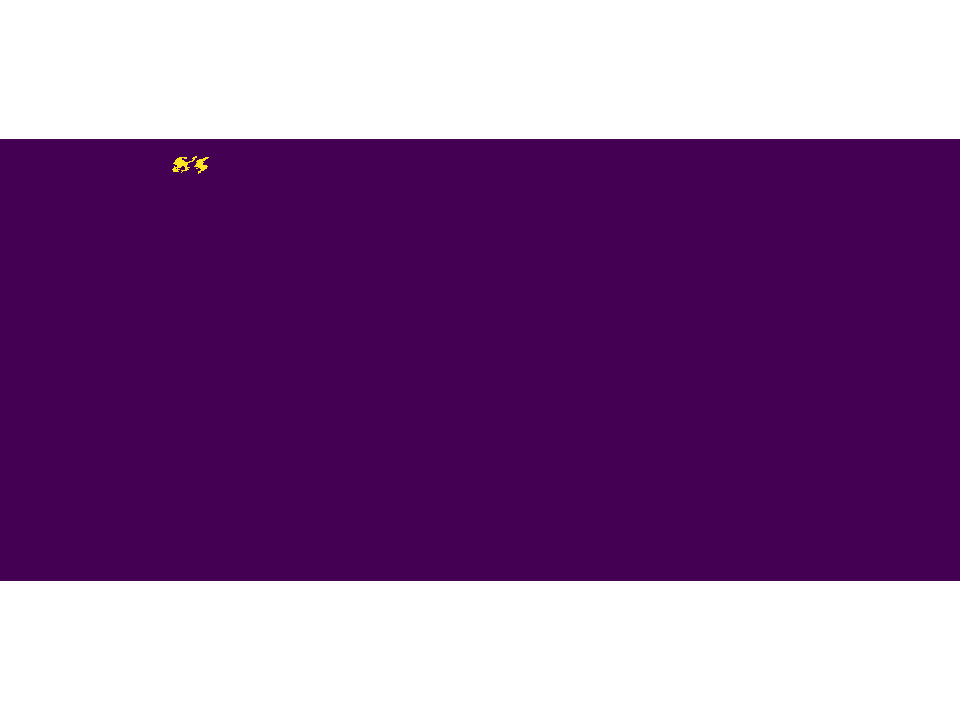

In [160]:
show(sel)

In [291]:
exists = np.bincount(step, minlength=len(idents))
key = (exists > 0).cumsum() #- 1
key

array([  1,   2,   2, ..., 927, 928, 929], dtype=int32)

In [273]:
exists.max(), exists.argmax()

(12, 35)

In [287]:
codes = key[step]
len(codes), codes

(1151, array([  1,   2,   5, ..., 928, 929, 930], dtype=int32))

In [285]:
groups = {}
for i, x in enumerate(codes):
    if x not in groups:
        groups[x] = set()
    groups[x].add(i)
len(groups)

930

In [286]:
groups

{1: {0},
 2: {1, 21},
 5: {2, 5},
 3: {3},
 4: {4},
 6: {6},
 7: {7},
 8: {8},
 9: {9},
 10: {10},
 11: {11, 31},
 22: {12, 14, 17, 18, 20, 22, 25, 26, 29, 30, 34, 35},
 12: {13, 36, 47},
 13: {15},
 14: {16, 50},
 15: {19},
 16: {23},
 17: {24},
 18: {27, 114},
 19: {28, 57, 66},
 20: {32},
 21: {33},
 25: {37, 42},
 23: {38},
 24: {39, 40, 41},
 45: {43, 65, 68, 75, 77, 78},
 26: {44},
 27: {45},
 28: {46},
 36: {48, 58},
 29: {49, 110},
 30: {51},
 31: {52},
 32: {53},
 33: {54},
 34: {55, 74},
 35: {56},
 37: {59},
 38: {60},
 42: {61, 71, 72},
 39: {62, 63, 69},
 40: {64},
 63: {67, 102},
 41: {70},
 43: {73},
 44: {76},
 67: {79, 108, 135},
 70: {80, 116},
 46: {81},
 47: {82, 91, 103},
 48: {83},
 49: {84},
 99: {85, 111, 136, 155},
 50: {86},
 51: {87},
 52: {88},
 53: {89},
 54: {90},
 69: {92, 115},
 55: {93},
 56: {94},
 57: {95},
 58: {96},
 59: {97},
 60: {98},
 61: {99},
 95: {100, 148},
 62: {101},
 64: {104},
 65: {105, 252},
 66: {106},
 84: {107, 112, 118, 120, 134},


In [280]:
# np.bincount(codes-1, minlength=codes.max())

In [281]:
fields = expanded.copy()
for i, code in tqdm(enumerate(codes), total=len(codes)):
    me = i + 1
    fields[expanded==me] = code

  0%|          | 0/1151 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


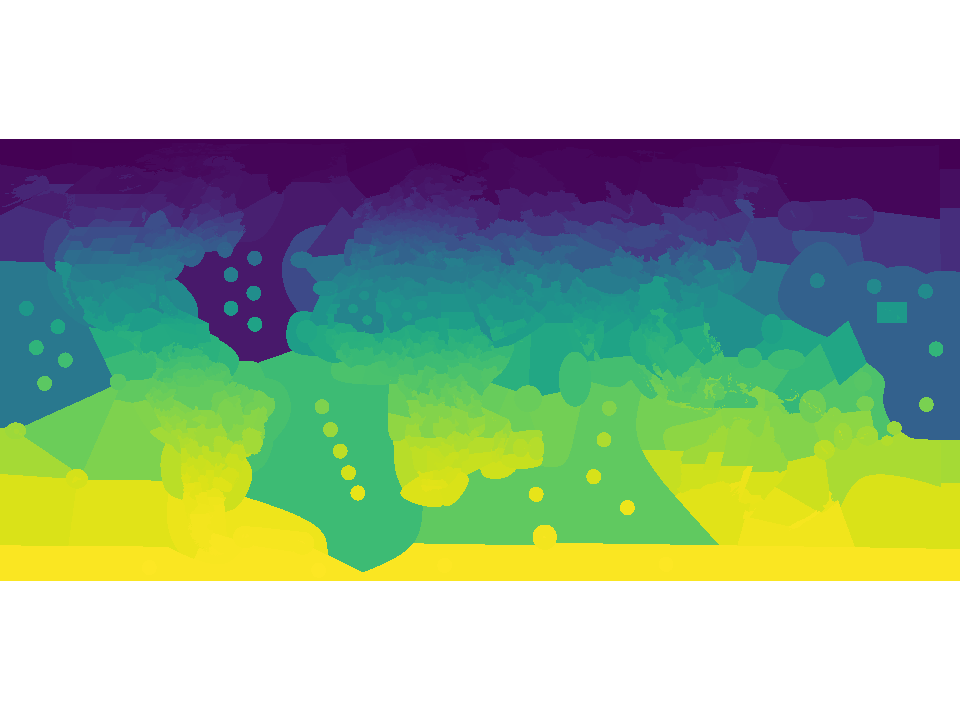

In [282]:
show(fields)

In [249]:
idents[[927, 945, 949, 953, 950, 965, 970, 978]]

array([927, 945, 952, 953, 950, 965, 970, 978])

In [190]:
idents[idents[step]+1]

array([929, 959, 962, 963, 964, 967, 972, 966])

In [189]:
idents[-1]

1150

In [261]:
len(step)

1151

In [370]:
# print(list(idents))

In [168]:
remaining = ['Northern Channel', 'Tuvalu water', 'Southwest Pacific Ocean', 'Isla la Pascua', 'Falklands water', 'ANT1', 'ANT2']

In [486]:
datapath = 'extra/col/col_idents_v2.yaml'

data = load_yaml(datapath)
# nodes = data['nodes']
# groups = data['fields']
# groups[369].remove(1067)
# groups[369].remove(965)
# groups.append([1067, 965])
# nodes[-1] = 'ANT1'
# nodes.append('ANT2')
# idx = nodes.index('PAO5')
# nodes[idx] = 'Southwest Pacific Ocean'
# nodes.append('PAO5')
# groups[558].remove(726)
# nodes[nodes.index('Cayor')] = 'Falklands water'
# nodes[558] = 'Cayor'
# nodes.append('Guinean Coast')
# groups.append([726])

names = data.get('nodes',None)
if names is not None:
    name_idx = {n:i for i,n in enumerate(names)}

cats = data.get('cats', None)
    
# save_yaml(data, 'extra\col_idents_v2.yaml')
data.keys()

dict_keys(['cats', 'edges', 'fields', 'idents', 'last', 'nodes'])

In [487]:
islands = {140: 105, 159: 98, 312: 286, 368: 337, 469: 437, 522: 474, 565: 552, 587: 541, 596: 521, 662: 620, 665: 624, 672: 544, 711: 682, 712: 685, 738: 704, 755: 714, 763: 735, 770: 725, 783: 766, 800: 791, 807: 793, 825: 801, 833: 823, 840: 794, 841: 827, 846: 831, 851: 834, 883: 873, 923: 916, 924: 917, 925: 921}
islands[name_idx['Hawaii']] = name_idx['Hawaii water']

In [488]:
names[394]

'Gulf of California'

In [481]:
name_idx['Hawaii']

524

In [482]:
for k in islands:
    cats[k] = 'island'

In [483]:

print(tabulate([(names[k], names[v], cats[k]) for k,v in islands.items()]))

----------------  ----------------------  ------
Bering Island     Bering Island water     island
Aleutin Island    Aleutin Island water    island
Ille de Sable     Ille de Sable water     island
Azores            Azores water            island
Gran Canaria      Gran Canaria water      island
Bahamas           Bahamas water           island
Gustavia          Gustavia water          island
Cabo Verde        Cabo Verde water        island
Guam              Guam water              island
Palau             Palau water             island
Micronesia        Micronesia water        island
Marshall Islands  Marshall Islands water  island
Vaitupu           Vaitupu water           island
Isla Isabella     Isla Isabella water     island
Maldives          Maldives water          island
Seychelles        Seychelles water        island
Tuvalu            Tuvalu water            island
Soloman Islands   Soloman Islands water   island
Lata              Lata water              island
Samoa             Sa

In [484]:
# save_yaml(data, datapath)

In [306]:
len(data['idents']), len(groups), len(nodes)

(1304, 934, 934)

In [307]:
nodes[-8:]

['ANT', 'ANT5', 'ANT4', 'ANT3', 'ANT1', 'ANT2', 'PAO5', 'Guinean Coast']

In [308]:
for i, n in enumerate(nodes):
    if n == 'Tuvalu':
        print(i)

735


In [309]:
node_names = {i:n for i,n in enumerate(nodes)}
name_nodes = {n:i for i,n in enumerate(nodes)}
len(node_names), len(name_nodes)

(934, 934)

In [310]:
groups[763]

[1098, 1091, 1108]

In [311]:
ind = 880
groups[ind], node_names[ind]

([1259, 1245], 'Southwest Pacific Ocean')

In [320]:
fields = np.zeros(expanded.shape)
for i, regions in tqdm(enumerate(groups), total=len(groups)):
    for r in regions:
        me = r + 1
        fields[expanded==me] = i+1

  0%|          | 0/934 [00:00<?, ?it/s]

In [284]:
nice = expanded.copy()%1000
borders = find_boundaries(expanded, connectivity=1, mode='thick', background=0)
nice[borders==1] = 0

<IPython.core.display.Javascript object>


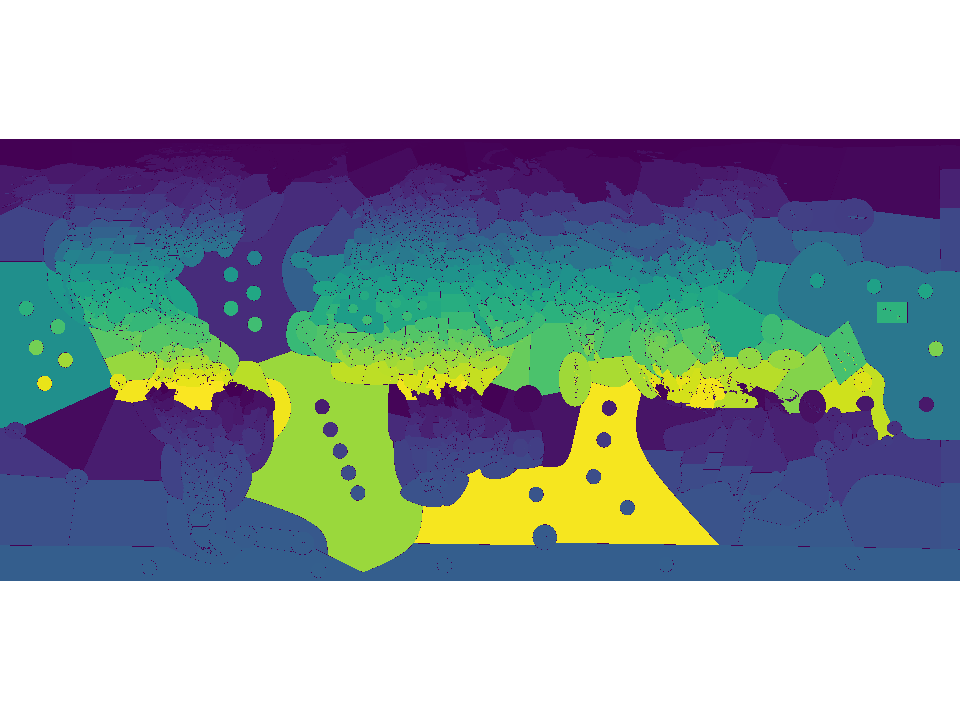

In [285]:
show(nice)

<IPython.core.display.Javascript object>


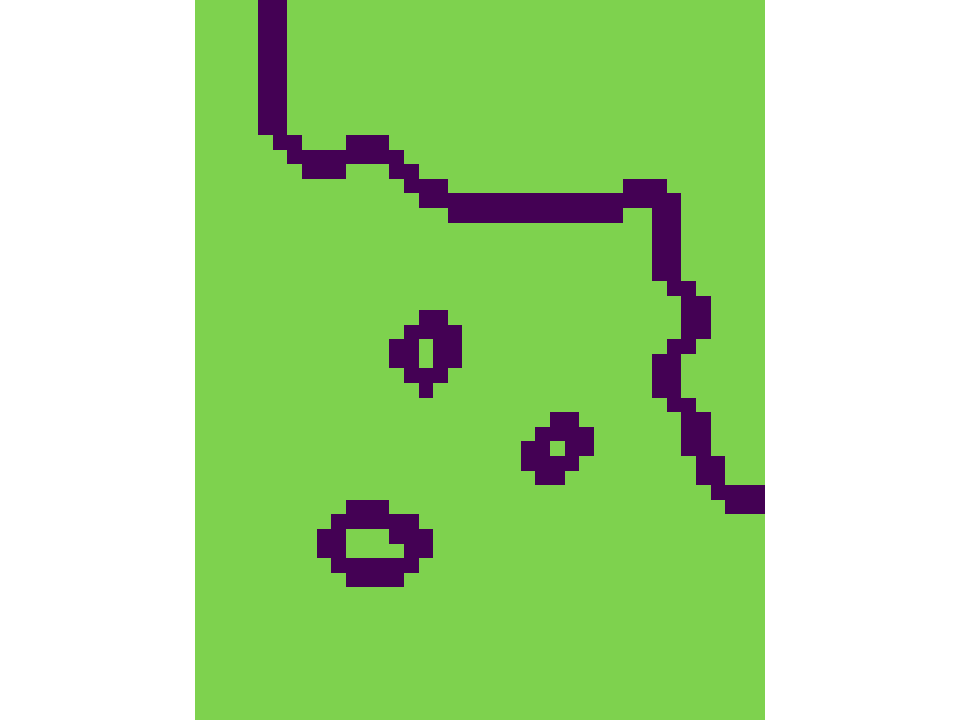

In [286]:
fld = fields.copy()-1
fld[borders==1] = -1000
show(fld)

In [188]:
# sel = np.zeros(expanded.shape)
# for i in src:
#     sel[expanded==i+1] = 1
# show(expanded)

In [312]:
resp = {}
for i, xs in enumerate(groups):
    for x in xs:
        if x in resp:
            print(i, x)
        resp[x] = i
    resp.update({x:i for x in xs})

In [313]:
resp[727-1]

933

In [409]:
name_nodes['Isla la Pascua water']

873

933 [726] Guinean Coast


<IPython.core.display.Javascript object>


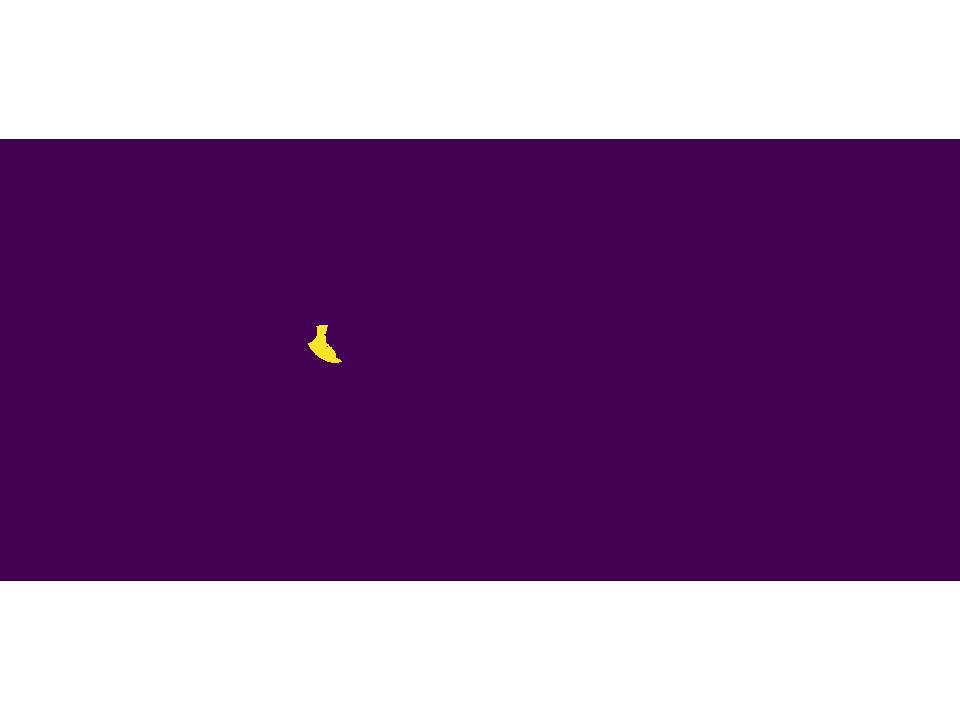

In [318]:
idx = name_nodes['PAO']
idx = name_nodes['Southwest Pacific Ocean']
idx = name_nodes['Isla la Pascua']
idx = name_nodes['Falklands water']
idx = name_nodes['Cayor']
idx = name_nodes['Guinean Coast']
# idx = name_nodes[remaining[1]]
# idx = 690-1
# idx = 917
# idx = 558

src = groups[idx]
print(idx, src, node_names[idx])
sel = np.zeros(expanded.shape)
for i in src:
    sel[expanded==i+1] = 1
show(sel)

In [326]:
# fixed_im = Image.fromarray(fields.astype(int))
# fixed_im.save("extra/col_fixed_v2_nodes.png")

In [485]:
names[20]

'Utqiagvik'

In [454]:
node_img = Image.open("extra/col/col_fixed_v2_nodes.png")
node_img = np.array(node_img)
borders = find_boundaries(node_img, connectivity=1, mode='thick', background=0)
nice = node_img.copy()-1
nice[borders==1] = -1000
node_img.shape

(4824, 10500)

<IPython.core.display.Javascript object>


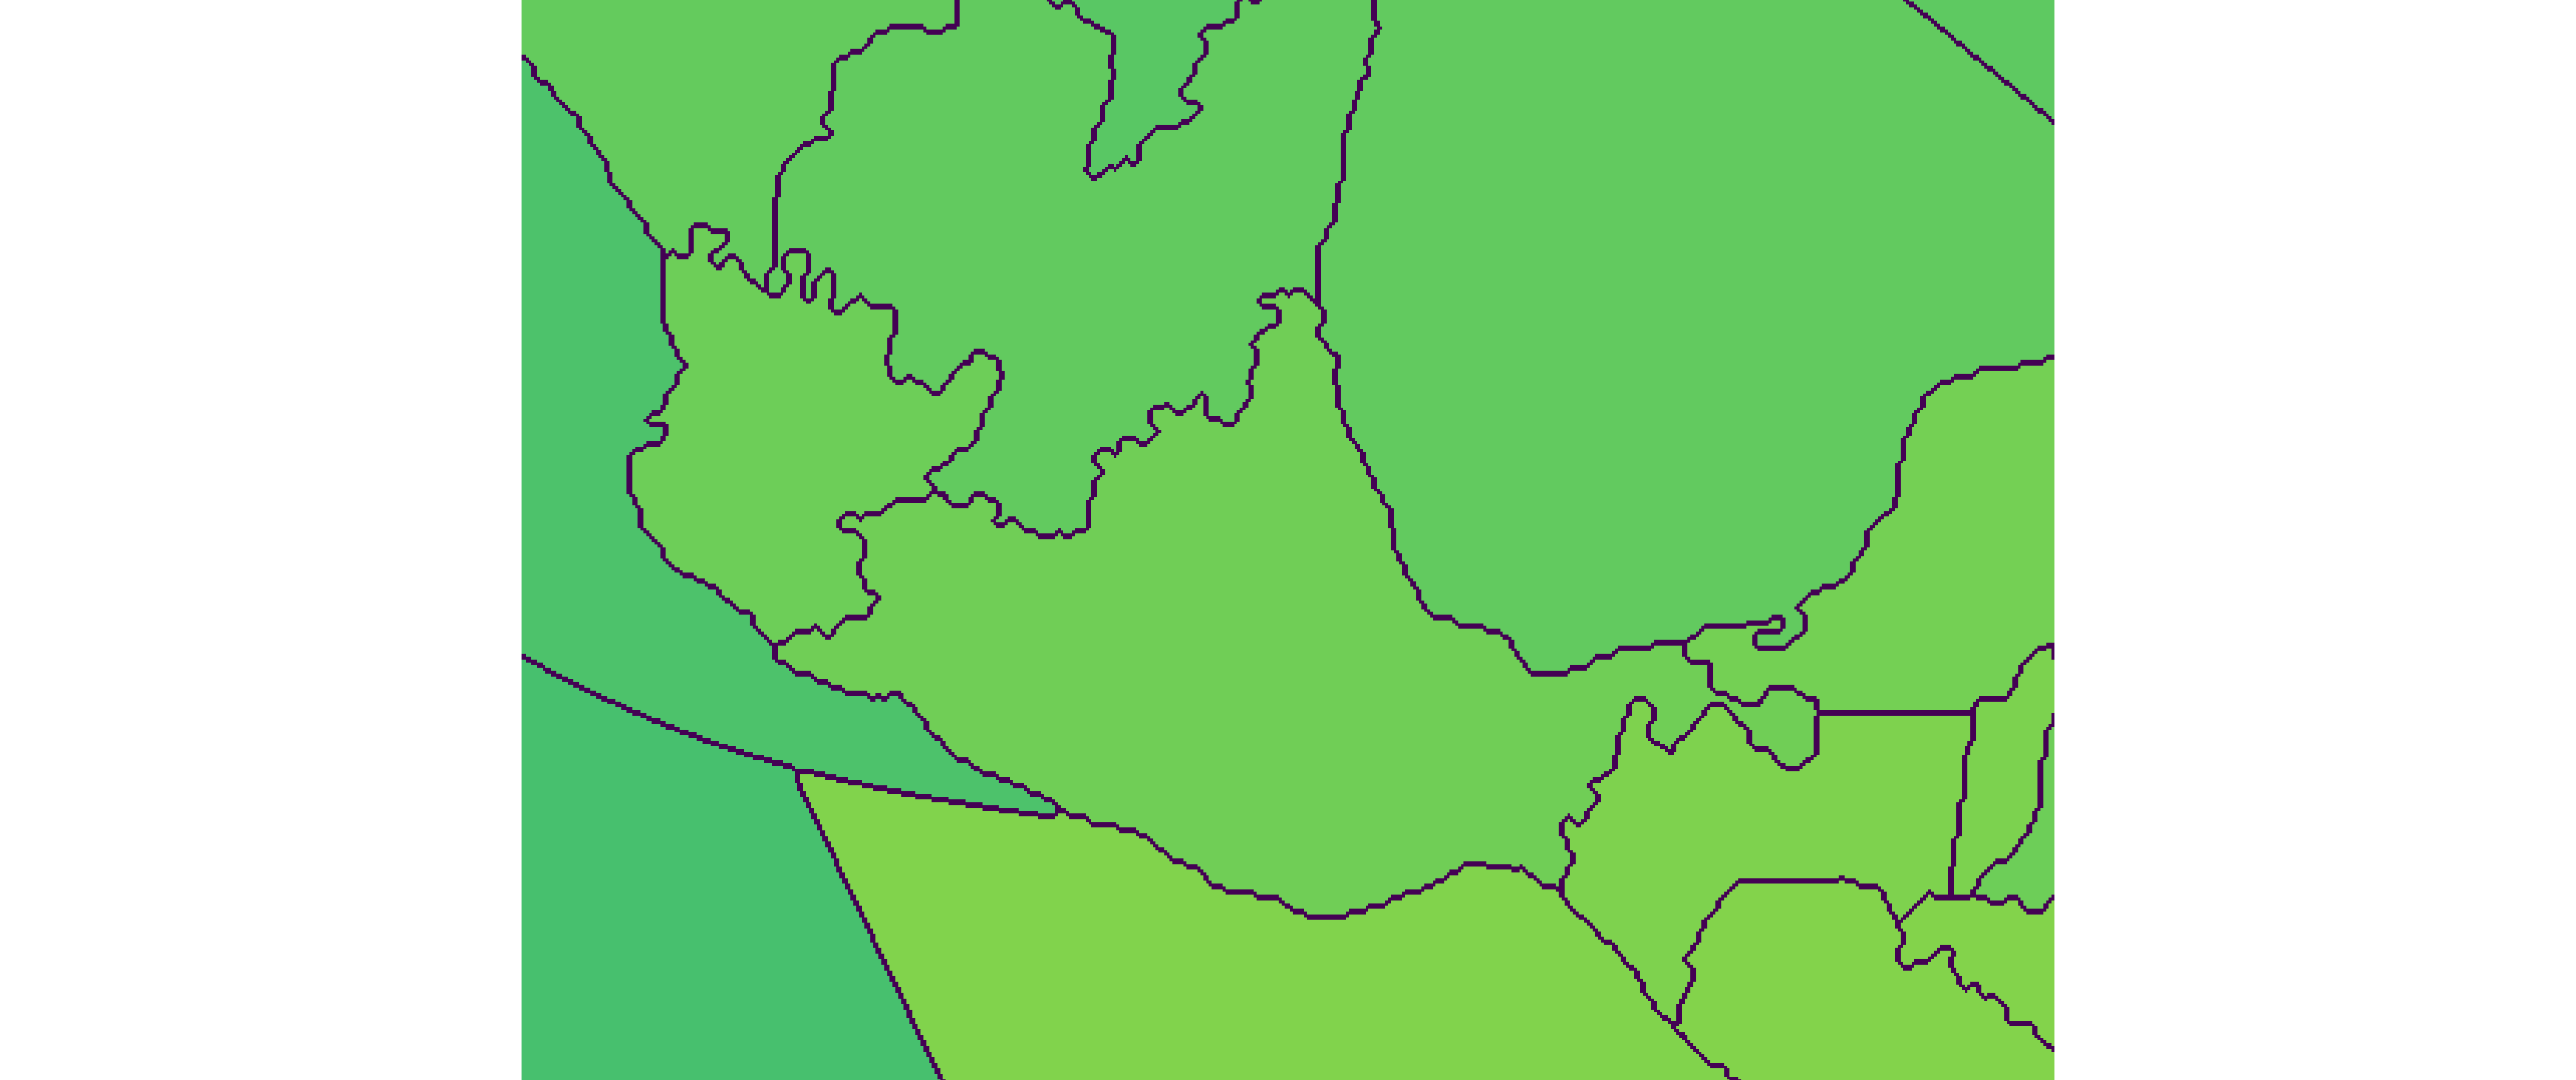

In [455]:
show(nice)

In [449]:
names[636]

'POA4'

In [544]:
regions = regionprops(node_img)
len(regions)

934

In [547]:
idx = 105
region = regions[idx]

<IPython.core.display.Javascript object>


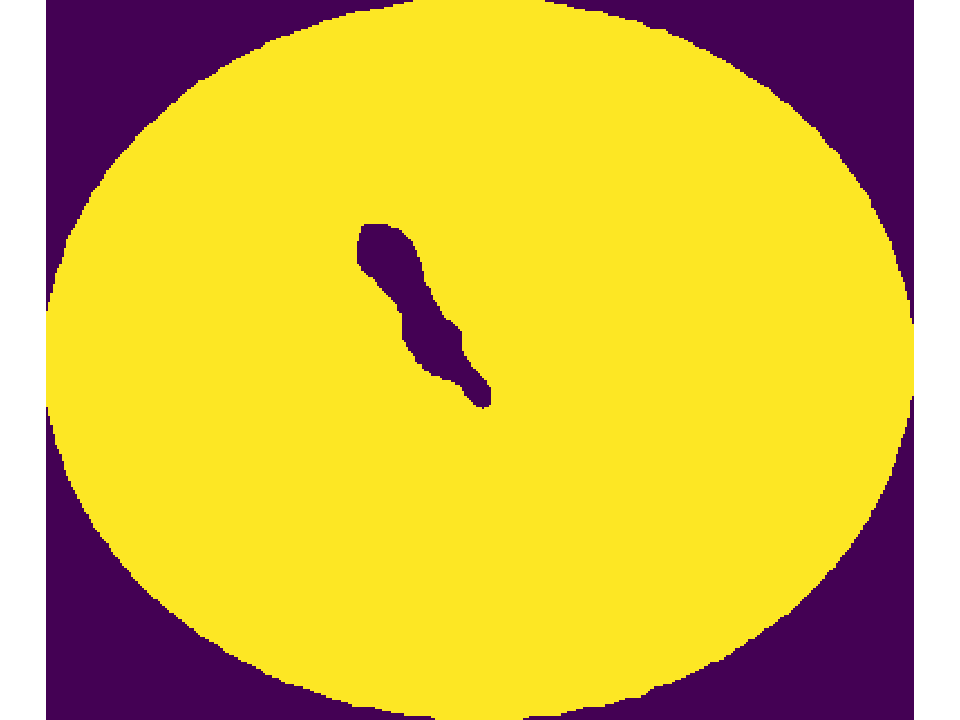

In [548]:
show(region.image)

In [549]:
def extend(slic, num=1):
    new = []
    for s in slic:
        new.append(slice(max(0,s.start-num), s.stop+num))
    return tuple(new)

In [550]:
print(region.slice)
print(extend(region.slice))

(slice(679, 1001, None), slice(8506, 8894, None))
(slice(678, 1002, None), slice(8505, 8895, None))


In [551]:
sub = node_img[extend(region.slice)]-1
bd = find_boundaries((sub==idx),mode='outer')

<IPython.core.display.Javascript object>


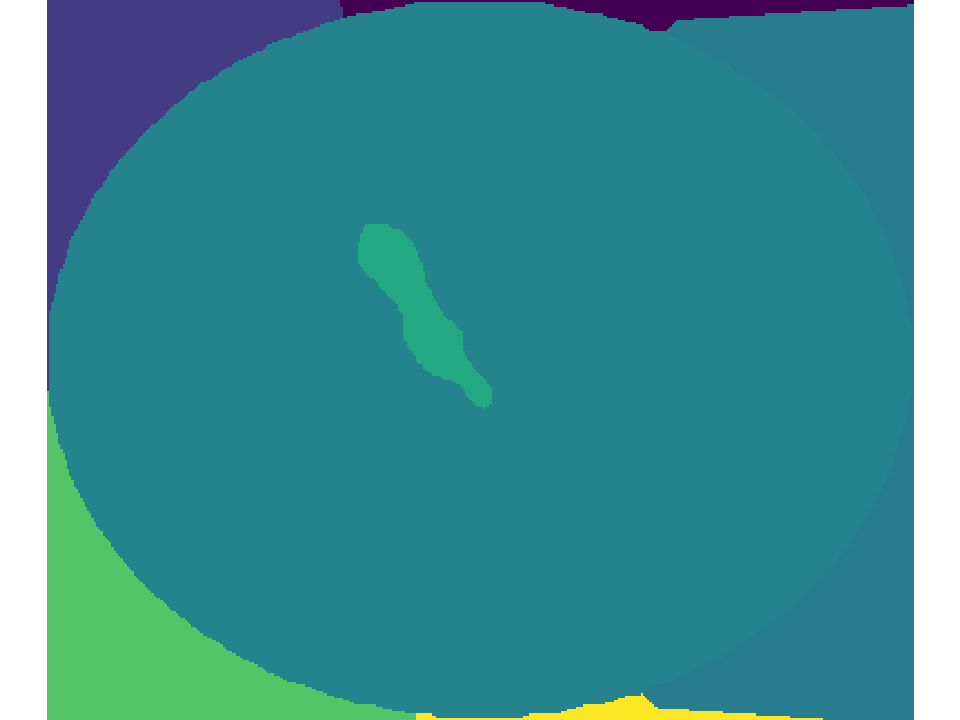

In [552]:
show(sub)

<IPython.core.display.Javascript object>


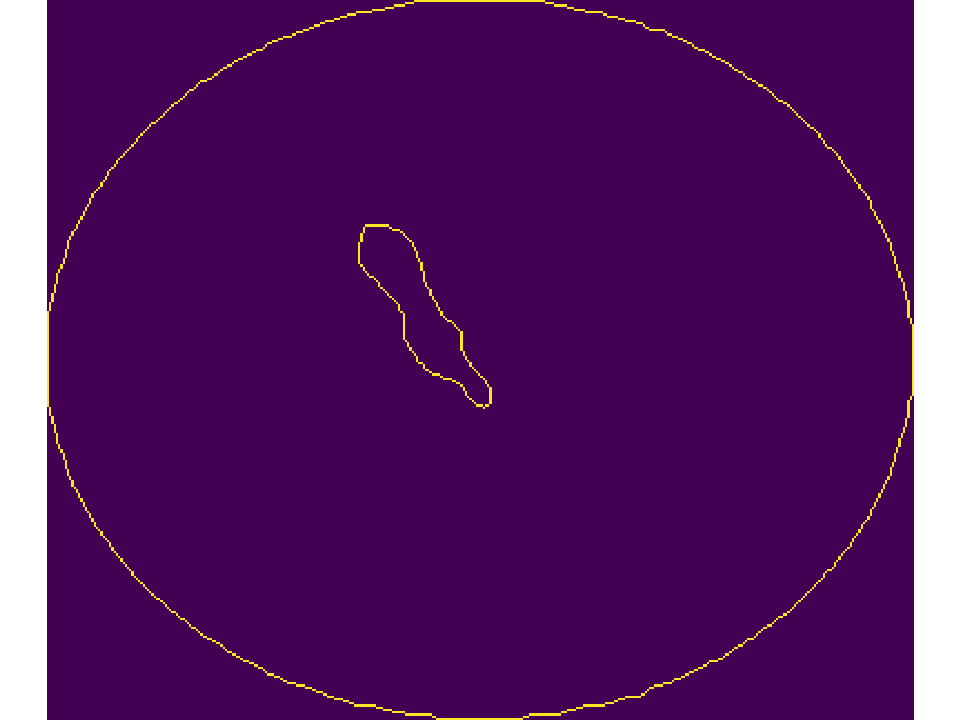

In [553]:
show(bd)

In [554]:
breg = regionprops(bd.astype(int))[0]

In [556]:
len(breg.coords)

1207

In [557]:
coords = breg.coords

In [558]:
sub[bd]

array([  8,   8,   8, ..., 225, 225, 225])

In [559]:

clf = NearestNeighbors(2).fit(coords)
G = clf.kneighbors_graph()
T = nx.from_scipy_sparse_matrix(G)
order = list(nx.dfs_preorder_nodes(T, 0))

C:\Users\anwan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [564]:
row = G[0]

In [568]:
from networkx import connected_components

In [572]:
xs = list(connected_components(T))
len(xs)

2

In [578]:
min(xs[0])

0

In [565]:
row.toarray()

array([[0., 1., 0., ..., 0., 0., 0.]])

<IPython.core.display.Javascript object>


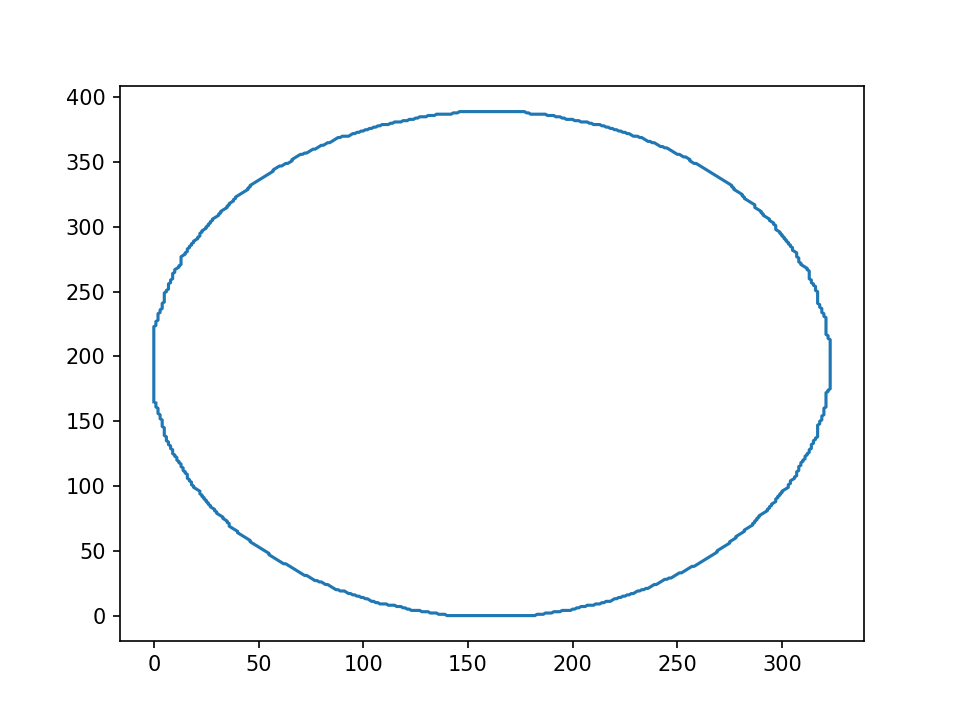

In [560]:


xx = coords[:,0][order]
yy = coords[:,1][order]

plt.figure()
plt.plot(xx, yy)

In [539]:
len(order)

1085

In [543]:
from itertools import groupby
[x[0] for x in groupby(sub[bd][order])]

[471, 467, 527, 559, 568, 394, 503, 471]

In [365]:
A = im[..., :-1].reshape(-1), im[..., 1:].reshape(-1)
B = im[:-1].reshape(-1), im[1:].reshape(-1)

In [366]:
pairs = set(zip(*A))
pairs.update(zip(*B))
len(pairs)

5826

In [367]:
edges = {}
for x, y in pairs:
    if x != y:
        if x not in edges:
            edges[x] = set()
        edges[x].add(y)
        if y not in edges:
            edges[y] = set()
        edges[y].add(x)
len(edges)

934

In [368]:
edges

{533: {499, 507, 530, 544, 549, 558, 590},
 507: {478, 499, 516, 530, 533},
 665: {629, 635, 680, 684, 691, 722, 725},
 691: {665, 684, 709, 722},
 191: {155, 157, 183, 195, 207},
 155: {129, 138, 157, 161, 191, 195},
 124: {83, 100, 110, 169, 170, 186, 201, 227},
 110: {59, 84, 100, 124, 169},
 351: {315, 321, 348, 356},
 321: {278, 290, 311, 315, 325, 351, 356},
 855: {698, 829, 849, 850, 864, 873, 879},
 849: {818, 819, 829, 854, 855, 870, 873},
 699: {653, 675, 693, 708, 717, 721},
 717: {693, 697, 699, 721, 731, 737},
 809: {762, 768, 781, 797, 818, 829},
 762: {710, 720, 758, 781, 790, 797, 809, 811, 817, 820, 829},
 731: {697, 717, 737, 750},
 145: {12, 99, 116, 226, 370},
 226: {99, 101, 106, 145, 168, 370},
 75: {37, 60, 97, 116, 144, 172},
 97: {21, 37, 60, 75, 88},
 535: {473, 479, 480, 515, 565, 571},
 565: {456, 515, 535, 571},
 520: {418, 498, 502, 539, 550},
 498: {418, 459, 503, 520, 550},
 869: {631},
 631: {58,
  511,
  652,
  654,
  657,
  694,
  698,
  711,
  746,
 

In [342]:
import random

In [398]:
node_edges = [[] for _ in range(len(edges))]
for k,vs in edges.items():
    k = int(k)-1
    if len(node_edges[k]):
        print(k)
    node_edges[k].extend(v.item() for v in vs)
# edges = {str(k):list(v) for k,v in edges.items()}
node_edges

[[33, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 20, 31],
 [33, 1, 5, 10, 43, 13, 52, 22, 23, 28],
 [1, 10, 13, 16, 18],
 [1, 39, 7, 11, 14, 17, 21, 25, 29, 30],
 [1, 2, 20, 33],
 [1, 34, 9, 81, 19, 24, 27],
 [1, 4, 36, 40, 8, 14, 17, 30],
 [1, 7, 40, 42, 14, 31],
 [1, 101, 6, 106, 12, 47, 81],
 [1, 2, 3, 13],
 [1, 4, 37, 12, 21],
 [1, 99, 37, 101, 9, 11, 145, 116],
 [2, 3, 67, 98, 38, 10, 46, 79, 16, 22, 55, 61],
 [8, 1, 4, 7],
 [1, 104, 74, 76, 19, 20, 57],
 [3, 13, 46, 18, 55, 58, 31],
 [36, 4, 7, 40, 39, 26, 30],
 [16, 1, 3, 31],
 [1, 6, 72, 108, 76, 15, 50, 24],
 [1, 33, 68, 5, 74, 15],
 [97, 4, 37, 11, 60, 29],
 [2, 35, 38, 13, 53, 23],
 [2, 28, 53, 22],
 [6, 50, 19, 54, 27],
 [64, 4, 39, 77, 85, 86, 56, 29],
 [36, 70, 40, 44, 48, 17, 59, 63],
 [24, 54, 34, 6],
 [2, 43, 53, 23],
 [4, 85, 21, 25, 60],
 [17, 4, 7],
 [1, 8, 42, 78, 16, 18, 58],
 [36],
 [1, 2, 68, 5, 71, 52, 20, 92, 95],
 [6, 47, 81, 54, 27, 93],
 [38, 103, 49, 51, 53, 22],
 [32, 7, 39, 45, 48, 17, 26],
 [97

C:\Users\anwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


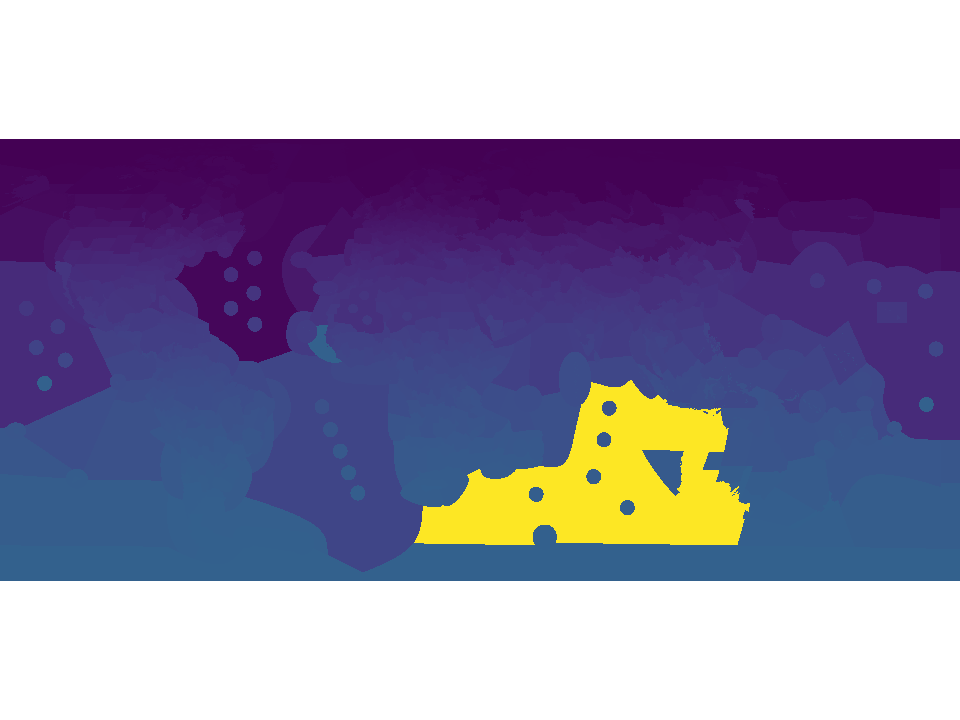

In [400]:
idx = random.choice(list(edges))

sel = im.copy()
sel[im==idx] = -3e3
for i in edges[idx]:
    sel[im==i] = 3e3

show(sel)

In [ ]:
im = node_img[1000:2000,1000:2000]
im.shape

In [434]:
data = load_yaml('extra\col\col_idents_v2.yaml')
data.keys()
# if 'fields' in data:
#     del data['fields']
# data['idents'] = idents.tolist()
# save_yaml(data, 'extra\col_idents_v2.yaml')

dict_keys(['cats', 'edges', 'fields', 'idents', 'last', 'nodes'])

In [437]:
replacements = {
    'Madeira Coast land': 'Madeira Coast island',
     'Gustavia land': 'Gustavia',
    'Gustavia': 'Gustavia water',
     'Cabo Verde land': 'Cabo Verde',
     'Guam land': 'Guam',
    'Guam': 'Guam water',
     'Micronesia land': 'Micronesia',
    'Micronesia': 'Micronesia water',
     'Marshall Islands land': 'Marshall Islands',
    'Marshall Islands': 'Marshall Islands water',
     'Vaiputu land': 'Vaitupu',
    'Vaitupu': 'Vaitupu water',
     'Isla Isabella land': 'Isla Isabella',
    'Isla Isabella': 'Isla Isabella water',
     'Maldives land': 'Maldives',
    'Maldives': 'Maldives water',
     'Seychelles land': 'Seychelles',
    'Seychelles': 'Seychelles water',
     'Tuvalu land': 'Tuvalu',
    'Tuvalu': 'Tuvalu water',
     'Samoa land': 'Samoa',
    'Samoa': 'Samoa water',
     'Papara land': 'Papara',
    'Papara': 'Papara water',
}

In [438]:
names = data['nodes']
len(names)

934

In [441]:
inds = {names.index(n):r for n,r in replacements.items()}
for i, n in inds.items():
    names[i] = n

In [413]:
# save_yaml(data, 'extra\col\col_idents_v2.yaml')

In [443]:
[n for n in names if ' land' in n.lower() or ' island' in n.lower()]

['Norwegian Sea island',
 'Aleutin Island water',
 'Aleutian Island Pass',
 'Bering Island water',
 'Bering Island',
 'Andreanof Islands',
 'Aleutin Island',
 'Near Islands',
 'Madeira Coast island',
 'Marshall Islands water',
 'Marshall Islands',
 'Soloman Islands water',
 'Soloman Islands']

In [444]:
[n for n in names if ' water' in n.lower()]

['Aleutin Island water',
 'Bering Island water',
 'Ille de Sable water',
 'Azores water',
 'Gran Canaria water',
 'Bahamas water',
 'Hawaii water',
 'Guam water',
 'Cabo Verde water',
 'Marshall Islands water',
 'Gustavia water',
 'Palau water',
 'Micronesia water',
 'Vaitupu water',
 'Isla Isabella water',
 'Maldives water',
 'Seychelles water',
 'Soloman Islands water',
 'Tuvalu water',
 'Lata water',
 'Samoa water',
 'Papara water',
 'Vanatu water',
 'Fiji water',
 'Tonga water',
 'Mauritius water',
 'Reunion water',
 'New Caledonia water',
 'Isla la Pascua water',
 "Micky D's water",
 'Falklands water',
 'Sandwich water']

[726]

In [408]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


for x in new_colors:
    print(hex_to_rgb(x))

(31, 119, 180)
(255, 127, 14)
(44, 160, 44)
(214, 39, 40)
(148, 103, 189)
(140, 86, 75)
(227, 119, 194)
(127, 127, 127)
(188, 189, 34)
(23, 190, 207)


In [404]:
data['edges'] = node_edges

In [405]:
data

{'fields': [[0],
  [2],
  [4],
  [5],
  [7],
  [8],
  [9, 34],
  [14],
  [17],
  [16, 18, 3, 6],
  [1, 20],
  [21],
  [29],
  [32, 33, 37, 40, 10, 42, 13, 15, 19, 22, 23, 24, 26, 27, 31],
  [25, 28, 45, 36],
  [46],
  [56, 55],
  [43, 11, 59],
  [35, 38, 39, 41, 47, 48, 52, 62],
  [57, 58, 60, 61, 63],
  [66],
  [68],
  [69],
  [70],
  [71],
  [73],
  [65, 76],
  [77],
  [81],
  [83, 44, 53],
  [80, 67, 12, 84],
  [85, 79],
  [86, 74, 30],
  [87],
  [91],
  [64, 49, 50, 51, 92],
  [72, 93],
  [95],
  [96, 90, 78],
  [97, 98, 75, 82, 54, 88, 94],
  [101],
  [102],
  [103],
  [106],
  [107],
  [108],
  [110],
  [113],
  [114],
  [115],
  [116],
  [117, 109],
  [89, 118],
  [119],
  [120],
  [121],
  [123],
  [124],
  [126],
  [129, 130],
  [133],
  [125, 134],
  [112, 135],
  [136, 100],
  [137],
  [139],
  [142],
  [143],
  [144],
  [104, 145],
  [146],
  [147],
  [148],
  [149],
  [150],
  [151],
  [152],
  [153],
  [154],
  [132, 138, 140, 155, 127],
  [128, 99, 156],
  [157],
  [160]

In [800]:
fpath = Path('extra/col/full.yaml')
full = load_yaml(fpath)
len(full)

869

In [801]:
for idx, info in nodes.items():
    name = info['name']
    if name in full:
        if 'coasts' in info:
            try:
                full[name]['navy-edges'] = {coast: [('{} ({})'.format(nodes[ind[0]]['name'], ind[1]) 
                                                     if isinstance(ind, list) else nodes[ind]['name']) for ind in inds]
                                            for coast, inds in info['navy-edges'].items()}
            except:
                print(info)
#     else:
#         print(name)

In [806]:
full['Karalveyem']

{'army-edges': ['Kagyrgyn', 'Penzhina', 'Gizhiga', 'Polyarny'],
 'coast-pos': {'NC': [329, 8181], 'SC': [464, 8311]},
 'env': 'coast',
 'idx': 33,
 'name': 'Karalveyem',
 'navy-edges': {'NC': ['Siberian Sea', 'Kagyrgyn', 'Polyarny'],
  'SC': ['Kagyrgyn', 'Yaponskoye More', 'Penzhina (EC)']},
 'pos': [426.82073975909316, 8197.568757838939],
 'sc': 1,
 'type': 'coast'}

In [807]:
# save_yaml(full, fpath)

In [725]:
full

{'ANT': {'env': 'sea',
  'idx': 926,
  'name': 'ANT',
  'navy-edges': ['INO5',
   'INO4',
   'INO3',
   'INO2',
   'INO1',
   'Great Australian Bight',
   'New Zealand Coast',
   'Hanson Bay',
   'Southwest Pacific Ocean',
   "Micky D's water",
   'SAO5',
   'SAO4',
   'SAO3',
   'SAO2',
   'SAO1',
   'Southwest Atlantic Ocean',
   'Sandwich water',
   'Island Pass',
   'Falklands water',
   'South American Cape',
   'Chilean Coast',
   'Southeast Pacific Ocean',
   'ANT5',
   'ANT4',
   'ANT3',
   'ANT1',
   'ANT2'],
  'pos': [4639.1433013000915, 5387.718866510107],
  'type': 'sea'},
 'ANT1': {'env': 'sea',
  'idx': 930,
  'name': 'ANT1',
  'navy-edges': ['INO5',
   'INO4',
   'INO3',
   'INO2',
   'INO1',
   'Great Australian Bight',
   'New Zealand Coast',
   'Hanson Bay',
   'Southwest Pacific Ocean',
   "Micky D's water",
   'SAO5',
   'SAO4',
   'SAO3',
   'SAO2',
   'SAO1',
   'Southwest Atlantic Ocean',
   'Sandwich water',
   'Island Pass',
   'Falklands water',
   'South Amer

In [601]:
island_water = [n for n, info in full.items() if ' water' in n]
len(island_water)

32

In [602]:
bgs = {}
for name in island_water:
    bgs[name] = full[name]
    del full[name]

In [603]:
bgs.keys()

dict_keys(['Aleutin Island water', 'Azores water', 'Bahamas water', 'Bering Island water', 'Cabo Verde water', 'Falklands water', 'Fiji water', 'Gran Canaria water', 'Guam water', 'Gustavia water', 'Hawaii water', 'Ille de Sable water', 'Isla Isabella water', 'Isla la Pascua water', 'Lata water', 'Maldives water', 'Marshall Islands water', 'Mauritius water', "Micky D's water", 'Micronesia water', 'New Caledonia water', 'Palau water', 'Papara water', 'Reunion water', 'Samoa water', 'Sandwich water', 'Seychelles water', 'Soloman Islands water', 'Tonga water', 'Tuvalu water', 'Vaitupu water', 'Vanatu water'])

In [606]:
raw = load_yaml('extra/col/col_idents_v2.yaml')
len(raw), raw.keys()

(7,
 dict_keys(['cats', 'fields', 'idents', 'last', 'nodes', 'ordered-edges', 'unordered-edges']))

In [609]:
inds, names = zip(*[(i,n) for i,n in enumerate(raw['nodes']) if n not in full])
len(inds), names

(62,
 ('none0',
  'lake',
  'none1',
  'none2',
  'Norwegian Sea island',
  'none3',
  'none4',
  'Aleutin Island water',
  'Bering Island water',
  'none5',
  'none6',
  'none7',
  'none8',
  'none9',
  'none10',
  'none11',
  'Ille de Sable water',
  'none12',
  'none13',
  'none14',
  'none15',
  'Azores water',
  'none16',
  'Madeira Coast island',
  'Gran Canaria water',
  'none17',
  'Bahamas water',
  'Hawaii water',
  'Guam water',
  'Macronesia',
  'Cabo Verde water',
  'Marshall Islands water',
  'Gustavia water',
  'Palau water',
  'Micronesia water',
  'none18',
  'none19',
  'Vaitupu water',
  'Isla Isabella water',
  'none20',
  'Maldives water',
  'Seychelles water',
  'Soloman Islands water',
  'none21',
  'Tuvalu water',
  'Lata water',
  'none22',
  'none23',
  'none24',
  'Samoa water',
  'Papara water',
  'Vanatu water',
  'Fiji water',
  'none25',
  'Tonga water',
  'Mauritius water',
  'Reunion water',
  'New Caledonia water',
  'Isla la Pascua water',
  "Micky D'

In [ ]:

borders = find_boundaries(im, connectivity=1, mode='thick', background=0)

im[borders == 1] = 0

clean = im.copy().clip(max=1)
clean = np.stack(3 * [clean], 2) * 255


In [612]:
regions = regionprops(im)
len(regions)

934

In [670]:
idx = 0
# fixed = [None]*len(inds)

In [752]:
def show_region(ind):
    region = regions[ind]
    y1, x1, y2, x2 = region.bbox
    x, y = x1, y1
    h = y2 - y1
    w = x2 - x1
    cy, cx = region.centroid

    img = clean.copy()
    sel = im == ind + 1
    img[sel] = [255, 0, 0]

    show(img)

    r = 1000
    if h < r:
        h = r
        y = cy - r / 2
    if w < r:
        w = r
        x = cx - r / 2

    plt.xlim(x, x + w)
    plt.ylim(y + h, y)

<IPython.core.display.Javascript object>


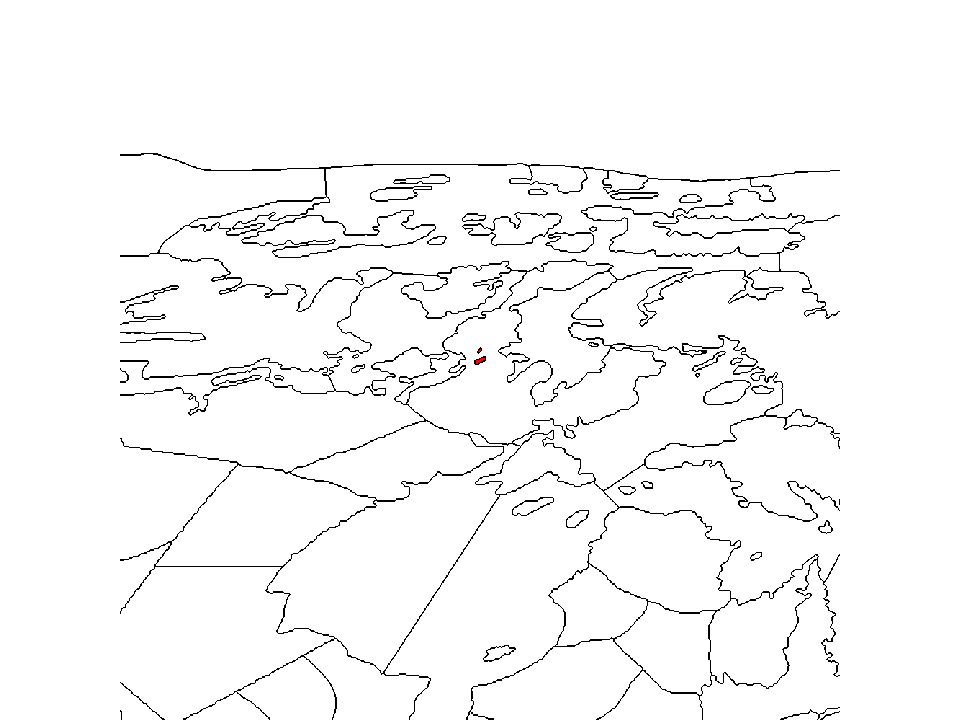

In [754]:
show_region(31)

In [716]:
while idx < len(fixed) and fixed[idx] is not None:
    print(f'skip: {idx} {fixed[idx]}')
    idx += 1

while not names[idx].startswith('none'):
    fixed[idx] = names[idx]
    print(f'Assigned {idx} {names[idx]}')
    idx += 1
    
if idx < len(inds):
    ind = inds[idx]
    show_region(ind)
    print(names[idx])

Assigned 54 Tonga water
Assigned 55 Mauritius water
Assigned 56 Reunion water
Assigned 57 New Caledonia water
Assigned 58 Isla la Pascua water
Assigned 59 Micky D's water
Assigned 60 Falklands water
Assigned 61 Sandwich water


IndexError: tuple index out of range

In [715]:
fixed[idx] = 'Titicaca'
idx += 1
idx, idx < len(fixed)

(54, True)

In [722]:
oceans = ['SAO', 'PAO', 'INO', 'ANT', 'NAO']

In [750]:
[full[o]['idx'] for o in oceans]

[630, 369, 697, 926, 57]

In [755]:
fixed = ['North Pole', 'Pangnikto Lake', 'Foxe Basin Lake', 'Great Bear Slave Lakes', 'Faroe Islands', 'Trondheim Fjord', 'Illiamna Lake', 'Aleutin Island water', 'Bering Island water', 'Lake Baikal', 'Lake Melville', 'Lake Winnipeg', 'St. Lawrence river', 'Lake Balkhash', 'Aral Sea', 'Aktau Lake', 'Ille de Sable water', 'Niagara river', 'Detroit river', 'Issyk Kul', 'Sea of Marmara', 'Azores water', 'Himalayas', 'Madeira Coast island', 'Gran Canaria water', 'Suez Canal', 'Bahamas water', 'Hawaii water', 'Guam water', 'Macronesia', 'Cabo Verde water', 'Marshall Islands water', 'Gustavia water', 'Palau water', 'Micronesia water', 'Panama Canal', 'Andaman Islands', 'Vaitupu water', 'Isla Isabella water', 'Lake Victoria', 'Maldives water', 'Seychelles water', 'Soloman Islands water', 'Lake Tanganyika', 'Tuvalu water', 'Lata water', 'Aldabra', 'Lake Malawi', 'Comoro Islands', 'Samoa water', 'Papara water', 'Vanuatu water', 'Fiji water', 'Titicaca', 'Tonga water', 'Mauritius water', 'Reunion water', 'New Caledonia water', 'Isla la Pascua water', "Micky D's water", 'Falklands water', 'Sandwich water', 'SAO', 'PAO', 'INO', 'ANT', 'NAO']
print(fixed)
inds = [0, 31, 40, 63, 66, 68, 87, 98, 105, 119, 146, 178, 238, 244, 261, 267, 286, 296, 300, 309, 336, 337, 420, 425, 437, 443, 474, 490, 521, 540, 541, 544, 552, 620, 624, 631, 647, 682, 685, 700, 704, 714, 725, 732, 735, 766, 771, 774, 789, 791, 793, 794, 801, 811, 823, 827, 831, 834, 873, 916, 917, 921, 630, 369, 697, 926, 57]
print(inds)

['North Pole', 'Pangnikto Lake', 'Foxe Basin Lake', 'Great Bear Slave Lakes', 'Faroe Islands', 'Trondheim Fjord', 'Illiamna Lake', 'Aleutin Island water', 'Bering Island water', 'Lake Baikal', 'Lake Melville', 'Lake Winnipeg', 'St. Lawrence river', 'Lake Balkhash', 'Aral Sea', 'Aktau Lake', 'Ille de Sable water', 'Niagara river', 'Detroit river', 'Issyk Kul', 'Sea of Marmara', 'Azores water', 'Himalayas', 'Madeira Coast island', 'Gran Canaria water', 'Suez Canal', 'Bahamas water', 'Hawaii water', 'Guam water', 'Macronesia', 'Cabo Verde water', 'Marshall Islands water', 'Gustavia water', 'Palau water', 'Micronesia water', 'Panama Canal', 'Andaman Islands', 'Vaitupu water', 'Isla Isabella water', 'Lake Victoria', 'Maldives water', 'Seychelles water', 'Soloman Islands water', 'Lake Tanganyika', 'Tuvalu water', 'Lata water', 'Aldabra', 'Lake Malawi', 'Comoro Islands', 'Samoa water', 'Papara water', 'Vanuatu water', 'Fiji water', 'Titicaca', 'Tonga water', 'Mauritius water', 'Reunion water'

In [718]:
# show(nice)

In [767]:
for water in island_water:
    if water[:-6] not in full:
        print(water)

In [756]:
full['Vanuatu']

{'army-edges': [],
 'env': 'island',
 'idx': 840,
 'name': 'Vanuatu',
 'navy-edges': ['Iles Horn', 'Ocean of Tonga'],
 'pos': [3230.367924528302, 9204.013626834381],
 'sc': 0,
 'type': 'coast'}

In [768]:
islands = {water: water[:-6] for water in island_water}
len(islands)

32

In [731]:
water

'Vanatu water'

In [757]:
bgs = {}
for name, idx in zip(fixed, inds):
    old = raw['nodes'][idx]
    bgs[name] = {'env':cats[idx], 'name':name, 'idx':idx}
    if old in full:
        if 'pos' in full[old]:
            bgs[name]['pos'] = full[old]['pos']
        if 'type' in full[old]:
            bgs[name]['type'] = full[old]['type']
len(bgs)

67

In [846]:
# islands

In [758]:
# save_yaml(bgs, 'extra/col/backgrounds.yaml')

In [783]:
errors = {}
for name, info in full.items():
    if 'army-edges' in info:
        for e in info['army-edges']:
            if e in bgs:
                errors[name] = e
                break
    if 'navy-edges' in info:
        for e in info['navy-edges']:
            if e in bgs:
                errors[name] = e
                break
    if name in bgs:
        errors[name] = name
errors

{}

In [782]:
for o in oceans:
    if o in full:
        del full[o]

for name, info in full.items():
    if 'army-edges' in info:
        info['army-edges'] = [(islands[e] if e in islands else e) for e in info['army-edges']]
    if 'navy-edges' in info:
        info['navy-edges'] = [(islands[e] if e in islands else e) for e in info['navy-edges']]
for w in islands:
    if w in full:
        del full[w]

In [786]:
# for n, info in full.items():
#     if 'navy-edges' in info:
#         if n in info['navy-edges']:
#             info['navy-edges'].remove(n)
    
#     if 'army-edges' in info:
#         if n in info['army-edges']:
#             info['army-edges'].remove(n)

In [788]:
full['Sandwich']

{'army-edges': [],
 'env': 'island',
 'idx': 925,
 'name': 'Sandwich',
 'navy-edges': ['Southwest Atlantic Ocean',
  'ANT5',
  'ANT4',
  'ANT3',
  'ANT2',
  'ANT1',
  'Island Pass'],
 'pos': [4396.771111111111, 3304.12],
 'sc': 1,
 'type': 'coast'}

In [954]:
fpath = Path('extra/col/full.yaml')
full = load_yaml(fpath)
len(full)

869

In [955]:
root = Path('extra/col/adj')
root.mkdir(exist_ok=True)

In [956]:
from omnibelt import load_tsv

In [942]:
# raw = load_tsv('extra/col/unit_info.tsv')
# raw[0]

['ï»¿Name', 'Capital', 'Territory', 'Color', 'Starting', 'Required']

In [943]:
# teams = {}
# names = ['Polish-Lithuanian Commonwealth', 'Nunavimiut', 'Austrian Empire', 'Aymara', 'Brandenburg-Prussia', 'Chukchi', 'Inuit', 'Japan', 'Menabe', 'Morocco', 'Buganda', 'China', 'Darfur', 'Ethiopia', 'Mocovi', 'Paiute', 'Persian Empire', 'Polynesia', 'Siam', 'Algonquian', 'Cherokee', 'Iroquois', 'Mughal Empire', 'Oyo', 'Rozwi Empire', 'Shuar', 'French Empire', 'British Empire', 'Ottoman Empire', 'Swedish Empire', 'Dutch Empire', 'Russian Empire', 'Spanish Empire', 'Portuguese Empire']
# props = raw[0][1:]
# for name, *row in raw[1:]:
#     if name in names:
#         teams[name] = dict(zip(props, row))
# len(teams)

34

In [944]:
# teams.keys()

dict_keys(['Polish-Lithuanian Commonwealth', 'Nunavimiut', 'Austrian Empire', 'Aymara', 'Brandenburg-Prussia', 'Chukchi', 'Inuit', 'Japan', 'Menabe', 'Morocco', 'Buganda', 'China', 'Darfur', 'Ethiopia', 'Mocovi', 'Paiute', 'Persian Empire', 'Polynesia', 'Siam', 'Algonquian', 'Cherokee', 'Iroquois', 'Mughal Empire', 'Oyo', 'Rozwi Empire', 'Shuar', 'French Empire', 'British Empire', 'Ottoman Empire', 'Swedish Empire', 'Dutch Empire', 'Russian Empire', 'Spanish Empire', 'Portuguese Empire'])

In [945]:
# len(full)

869

In [946]:
# for name, info in teams.items():
#     owns = info['Territory'].split(', ')
#     fleets = [f.endswith(' [F]') for f in owns]
#     owns = [(o[:-4] if f else o) for o, f in zip(owns, fleets)]
#     for o in owns:
#         if o not in full:
#             print(name, o)
#             break
#     info['Territory'] = owns
#     info['Navy'] = [o for o, f in zip(owns, fleets) if f]
#     info['Army'] = [o for o, f in zip(owns, fleets) if not f and 'sc' in full[o] and full[o]['sc'] > 0]
#     info['Required'] = int(info['Required'])
#     info['Starting'] = int(info['Starting'])
    
    

In [957]:
teams = load_yaml('extra/col/player_info.yaml')

In [958]:
teams['Polynesia']

{'Army': [],
 'Capital': 'Tonga',
 'Color': '#FFFB9B',
 'Navy': ['Vaitupu', 'Tonga', 'Auckland', 'Isla la Pascua'],
 'Required': 22,
 'Starting': 4,
 'Territory': ['Vaitupu', 'Tonga', 'Auckland', 'Isla la Pascua']}

In [961]:
players = {}
for name, info in teams.items():
    units = []
    for a in info['Army']:
        units.append({'loc':a, 'type': 'army'})

    for a in info['Navy']:
        units.append({'loc':a, 'type': 'fleet'})
    
    assert len(units) == info['Starting'], name
    
    players[name] = {'units': units, 'name': name, 'owns': info['Territory'], 'capital': info['Capital'], 'color': info['Color'], 'required': info['Required']}
len(players)

34

In [ ]:
root = Path('extra/col/adj')
root.mkdir(exist_ok=True)

In [966]:
players = load_yaml(root/'players.yaml')
full = load_yaml(root/'graph.yaml')

In [974]:
im = Image.open(str(root/'col_fixed_v2_nodes.png'))
im = np.array(im)
# im = np.logical_not(im).astype(int)

In [ ]:
regions = regionprops(im)
len(regions)

In [975]:

borders = find_boundaries(im, connectivity=1, mode='thick', background=0)

im[borders == 1] = 0

clean = im.copy().clip(max=1)
clean = np.stack(3 * [clean], 2) * 255

In [978]:
info = full['Mexico City']
idx = info['idx']
info

{'army-edges': ['Tamaulipas', 'Yucatan', 'Chiapas', 'Jalisco'],
 'coast-pos': {'NC': [1987, 1191], 'WC': [2079, 1097]},
 'env': 'coast',
 'idx': 511,
 'name': 'Mexico City',
 'navy-edges': {'NC': ['Tamaulipas', 'West Gulf of Mexico', 'Yucatan'],
  'WC': ['Chiapas',
   'Central American Coast',
   'Gulf of California',
   'Jalisco']},
 'pos': [2012.431282261849, 1131.081739793524],
 'sc': 1,
 'type': 'coast'}

<IPython.core.display.Javascript object>


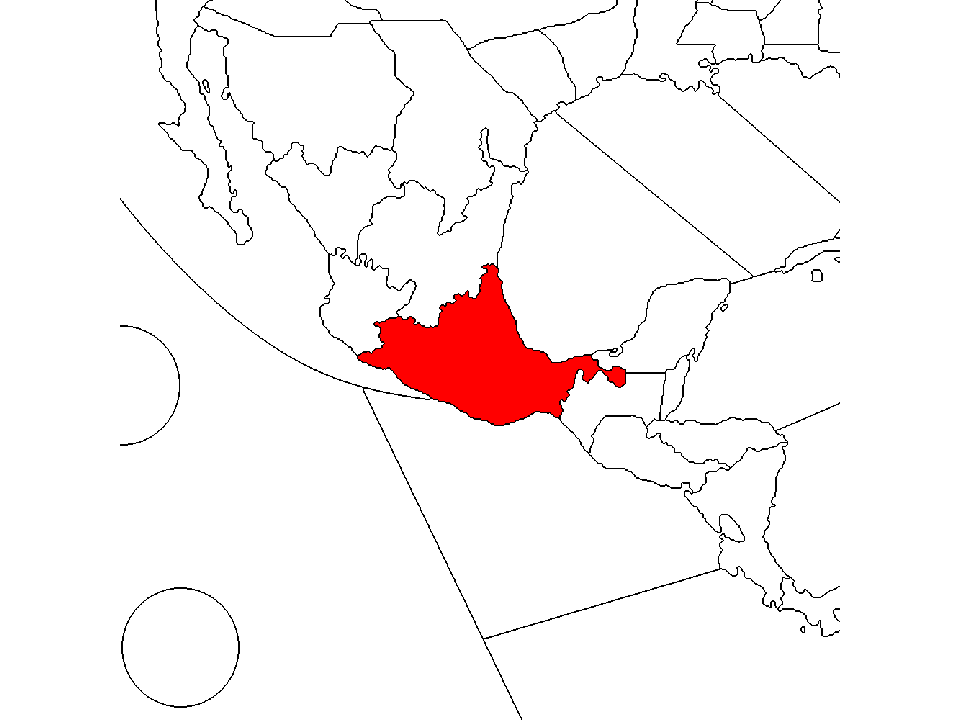

In [977]:
show_region(idx)

In [ ]:
regions[idx]